# AVANCE 2

# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# Configuracion inicial

In [4]:
# Para que los gráficos se vean bien
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,8)

# Ruta del archivo
ruta = r"C:\Users\PC\Documents\HENRY\MOD 4\MODULO 4\DatosFinalesFiltrados.csv"

# Carga de datos
df = pd.read_csv(ruta, parse_dates=["date"])  # si la columna date es fecha




In [5]:

# 1. Número total de filas y columnas
print("Shape (filas, columnas):", df.shape)


Shape (filas, columnas): (3756, 50)


# Analisis Estadistico

In [6]:
# Ver las primeras filas, tipos de datos, valores faltantes
print(df.head())
print(df.info())
print(df.describe())  # estadísticas básicas para columnas numéricas


  location_key       date country_code country_name  new_confirmed  \
0           AR 2020-12-31           AR    Argentina         8571.0   
1           AR 2021-01-01           AR    Argentina         2685.0   
2           AR 2021-01-02           AR    Argentina         7767.0   
3           AR 2021-01-03           AR    Argentina         4934.0   
4           AR 2021-01-04           AR    Argentina        13953.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         126.0             1660182.0              46382.0   
1         140.0             1662867.0              46522.0   
2         166.0             1670634.0              46688.0   
3         157.0             1675568.0              46845.0   
4         157.0             1689521.0              47002.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                18804.0  44938712.0  ...   
1                                18849.0  44938712.0  ...   
2                      

In [7]:
# Obtener valores únicos de la columna 'country_name'
valores_unicos = df["country_name"].unique()

print(valores_unicos)


['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']


In [9]:
# Medidas específicas de tendencia central, dispersión
for col in ["gdp_per_capita_usd", "life_expectancy", "average_temperature_celsius", "cumulative_vaccine_doses_administered"]:
    print(f"--- Estadísticas de {col} ---")
    print("Media:", df[col].mean())
    print("Mediana:", df[col].median())
    print("Moda:", df[col].mode().iloc[0] if not df[col].mode().empty else np.nan)
    print("Desviación estándar:", df[col].std())
    print("Varianza:", df[col].var())
    print("Mínimo:", df[col].min(), "Máximo:", df[col].max())
    print("Cuantiles 25%, 50%, 75%:", df[col].quantile([0.25, 0.5, 0.75]).to_list())
    print()


--- Estadísticas de gdp_per_capita_usd ---
Media: 9481.833333333334
Mediana: 9290.0
Moda: 6432.0
Desviación estándar: 2766.047267190494
Varianza: 7651017.484332001
Mínimo: 6432.0 Máximo: 14896.0
Cuantiles 25%, 50%, 75%: [6977.0, 9290.0, 10006.0]

--- Estadísticas de life_expectancy ---
Media: 76.80850000000001
Mediana: 76.518
Moda: 74.992
Desviación estándar: 1.5973932746097024
Varianza: 2.5516652737683083
Mínimo: 74.992 Máximo: 80.042
Cuantiles 25%, 50%, 75%: [75.672, 76.518, 77.109]

--- Estadísticas de average_temperature_celsius ---
Media: 21.01879425013463
Mediana: 21.611111
Moda: 27.277778
Desviación estándar: 6.061785765119992
Varianza: 36.745246662211365
Mínimo: 3.432099 Máximo: 39.138889
Cuantiles 25%, 50%, 75%: [17.290123, 21.611111, 25.777778]

--- Estadísticas de cumulative_vaccine_doses_administered ---
Media: 77490552.49114485
Mediana: 42230209.5
Moda: 209673612.0
Desviación estándar: 95879104.87342058
Varianza: 9192802751328382.0
Mínimo: 18.0 Máximo: 347868481.0
Cuantile

In [10]:
#Código para armar una tabla de estadísticas y exportarla
columnas = ["gdp_per_capita_usd", "life_expectancy", "average_temperature_celsius", "cumulative_vaccine_doses_administered"]

estadisticas = []

for col in columnas:
    stats = {
        "variable": col,
        "media": df[col].mean(),
        "mediana": df[col].median(),
        "moda": df[col].mode().iloc[0] if not df[col].mode().empty else np.nan,
        "desviacion_std": df[col].std(),
        "varianza": df[col].var(),
        "minimo": df[col].min(),
        "maximo": df[col].max(),
        "q25": df[col].quantile(0.25),
        "q50": df[col].quantile(0.5),
        "q75": df[col].quantile(0.75),
    }
    estadisticas.append(stats)

df_estadisticas = pd.DataFrame(estadisticas)
df_estadisticas.to_csv("estadisticas_columnas.csv", index=False)


In [11]:
# Correlaciones entre variables numéricas
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print(corr_matrix)


                                       new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.523533   
new_deceased                                0.523533      1.000000   
cumulative_confirmed                        0.429577      0.191008   
cumulative_deceased                         0.396632      0.266461   
cumulative_vaccine_doses_administered       0.293135     -0.047988   
population                                  0.500976      0.452719   
population_male                             0.497640      0.452973   
population_female                           0.496115      0.452197   
population_rural                            0.369487      0.391337   
population_urban                            0.493860      0.447654   
population_density                         -0.137057     -0.005020   
human_development_index                    -0.115909     -0.227977   
population_age_00_09                        0.439255      0.421166   
population_age_10_19

In [12]:
#Pero para que funcione bien en Power BI, lo convertimos a formato largo:
corr_larga = corr_matrix.stack().reset_index()
corr_larga.columns = ["Variable_1", "Variable_2", "Correlacion"]
corr_larga.to_csv("correlacion_variables.csv", index=False)


# Visualizacion de Datos

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\2329163996.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles, labels=labels, title="Países", title_fontsize=13, fontsize=11, loc="upper right")


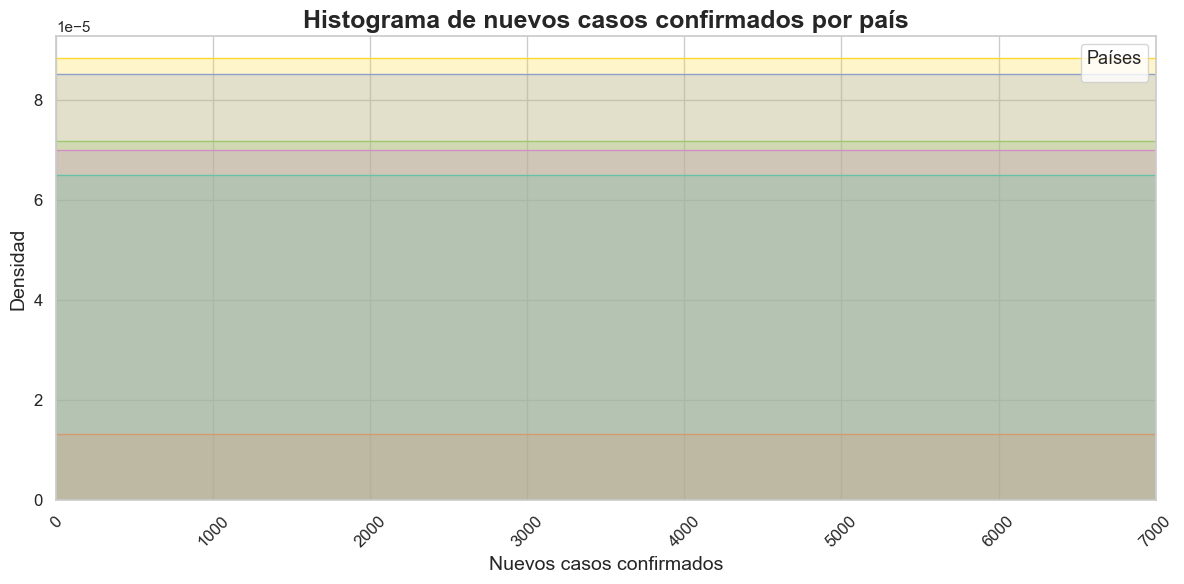

In [21]:
# Histograma de casos confirmados nuevos

plt.figure(figsize=(12,6))
sns.histplot(
    data=df, 
    x="new_confirmed", 
    bins = 30,
    hue="country_name", 
    element="step", 
    stat="density", 
    common_norm=False, 
    palette="Set2"  # paleta más suave pero clara)
)
plt.title("Histograma de nuevos casos confirmados por país", fontsize = 18, fontweight = "bold")
plt.xlabel("Nuevos casos confirmados", fontsize = 14)
plt.ylabel("Densidad", fontsize = 14)
plt.xticks(rotation=45, fontsize=12)  # rotamos etiquetas del eje X para que no se amontonen
plt.yticks(fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="Países", title_fontsize=13, fontsize=11, loc="upper right")
plt.xlim(0,7000)   #Reduciendo el rango para modificacion de grafico 
plt.tight_layout()  # ajusta automáticamente márgenes para que nada se corte
plt.show()

El gráfico muestra una distribución extremadamente sesgada o asimétrica hacia la izquierda. La gran mayoría de los datos se agrupan en un rango muy pequeño, mientras que los valores atípicos o muy altos son muy raros. No resulta util este grafico.

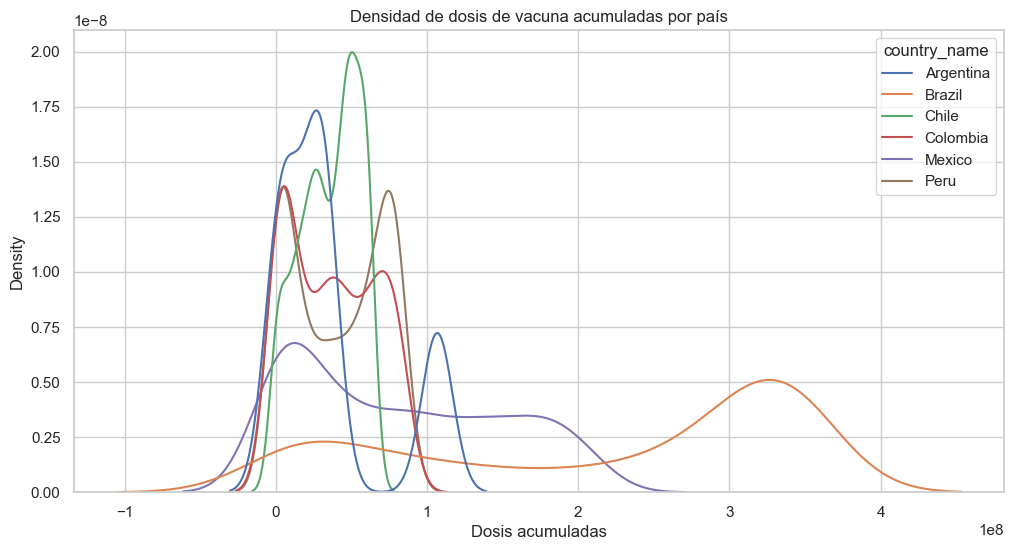

In [22]:
# Gráfico de densidad de tasas de vacunación acumuladas
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x="cumulative_vaccine_doses_administered", hue="country_name", common_norm=False)
plt.title("Densidad de dosis de vacuna acumuladas por país")
plt.xlabel("Dosis acumuladas")
plt.show()


El gráfico muestra que la mayoría de los países (Argentina, Chile, Colombia, Perú, y parte de Brasil) acumularon la mayor parte de sus dosis de vacuna dentro de un rango más bajo, mientras que Brasil y México mostraron una mayor variabilidad y un comportamiento distinto en sus distribuciones de dosis.

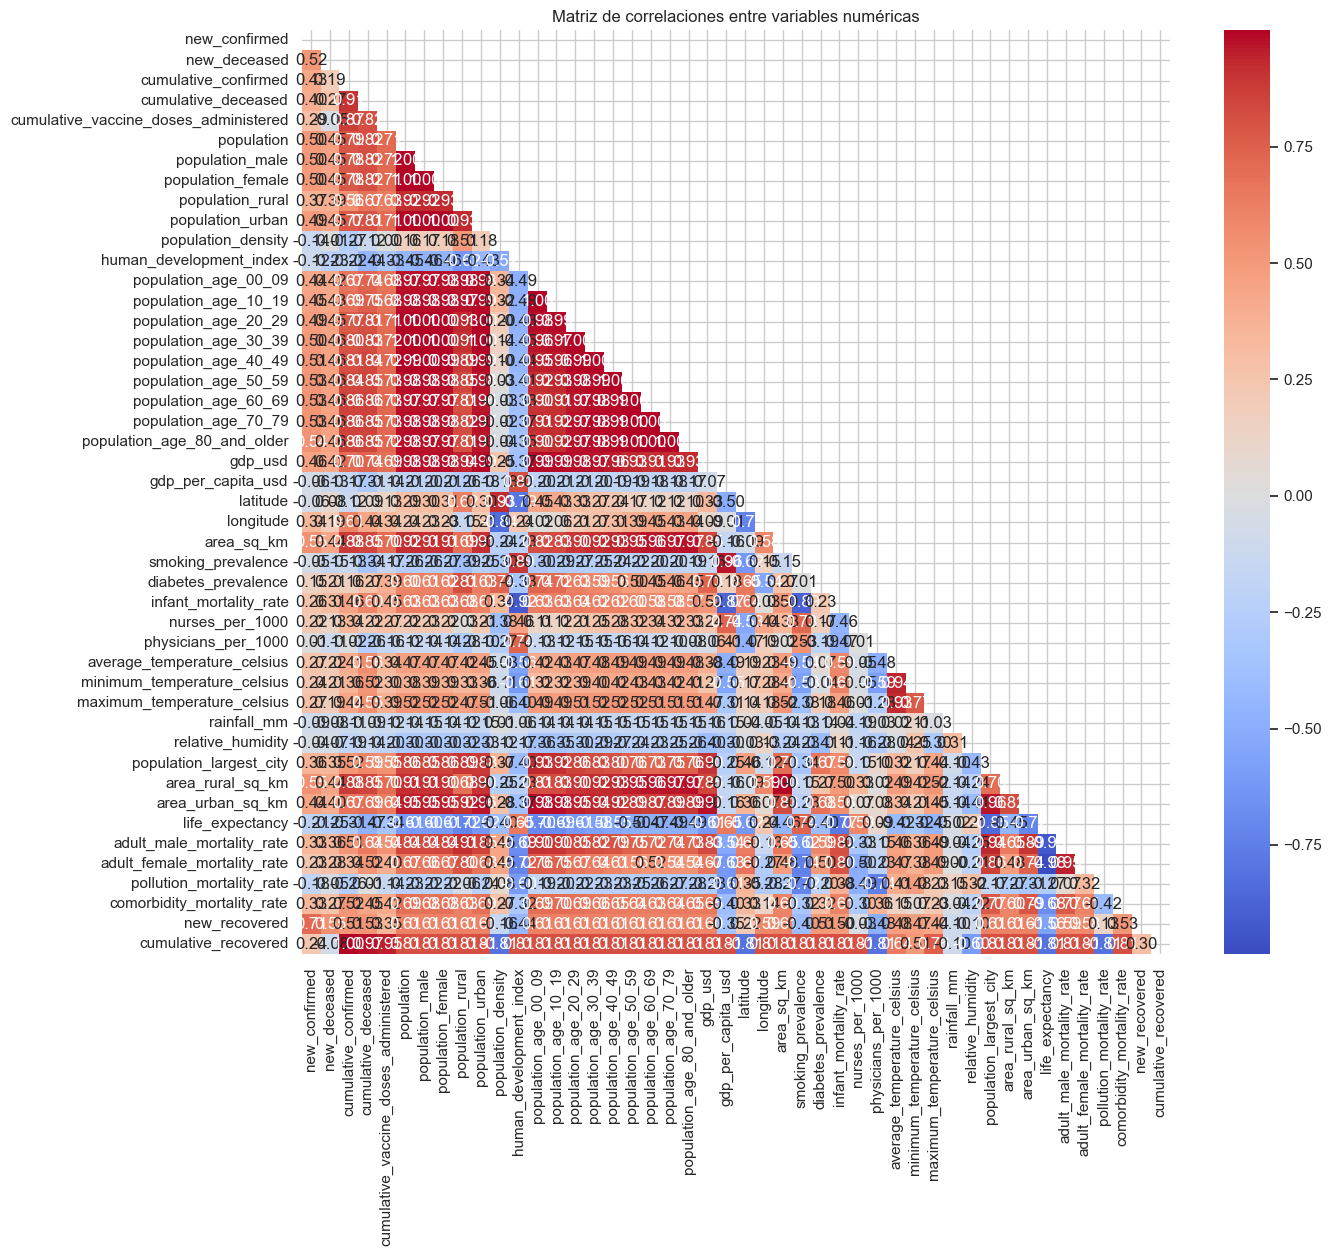

In [23]:
# Matriz de correlación (heatmap)
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()


La matriz de correlaciones es una herramienta muy útil para identificar rápidamente cuáles son las variables que se mueven juntas. Los colores y los valores numéricos nos dicen no solo si hay una relación, sino también la dirección y la fuerza de esa relación.

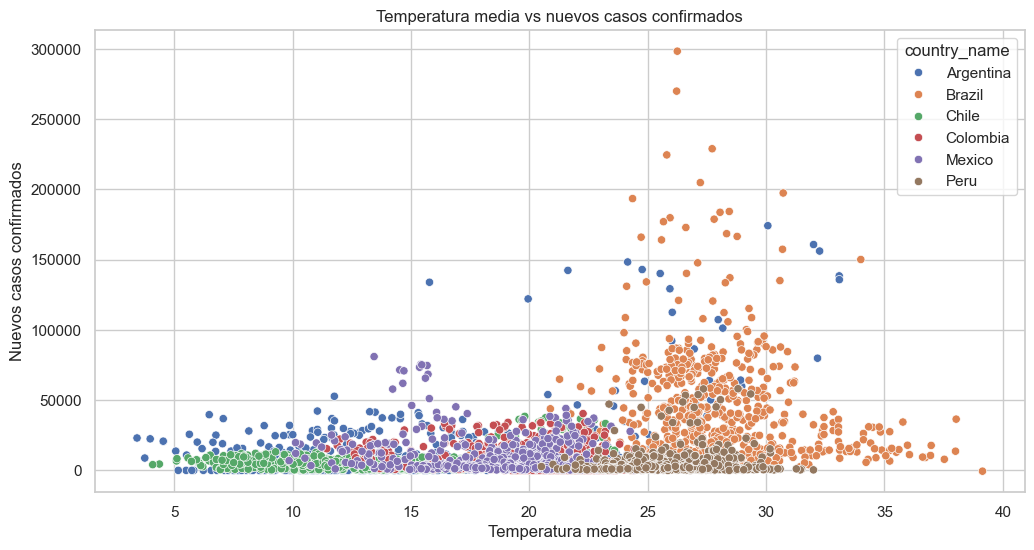

In [24]:
# Diagrama de dispersión: temperatura media vs casos confirmados nuevos
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="average_temperature_celsius", y="new_confirmed", hue="country_name")
plt.title("Temperatura media vs nuevos casos confirmados")
plt.xlabel("Temperatura media")
plt.ylabel("Nuevos casos confirmados")
plt.show()


Relación General: No hay una tendencia lineal evidente que demuestre que a mayor temperatura haya más o menos casos. El gráfico sugiere que la temperatura media por sí sola no es un factor determinante para predecir el número de nuevos casos confirmados. Otros factores, como la densidad de población, las políticas de salud pública, la capacidad de pruebas, y la estacionalidad específica de cada país, probablemente influyen mucho más en la aparición de nuevos casos.							
                       
En conclusión, el gráfico muestra la distribución de casos en función de la temperatura para cada país, revelando que Brasil experimentó picos de casos en temperaturas más cálidas, mientras que otros países como Chile y Colombia tuvieron sus datos de casos en rangos de temperatura más bajos o estables. Sin embargo, no se puede afirmar que exista una relación directa de causa y efecto.							


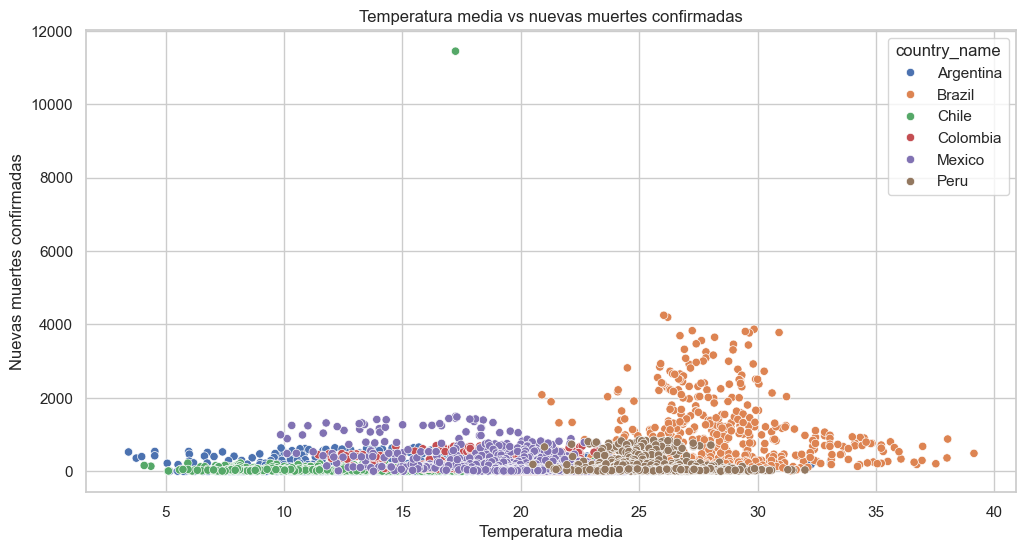

In [25]:
# Temperatura media vs muertes confirmadas nuevas
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="average_temperature_celsius", y="new_deceased", hue="country_name")
plt.title("Temperatura media vs nuevas muertes confirmadas")
plt.xlabel("Temperatura media")
plt.ylabel("Nuevas muertes confirmadas")
plt.show()


Punto atípico de Chile: Hay un punto notable en Chile (verde) con un número de muertes excepcionalmente alto (más de 11,000), a una temperatura media de alrededor de 16°C. Esto es un valor atípico que podría ser el resultado de un solo día con un registro masivo de muertes, un ajuste de datos o un evento particular que no está relacionado con la temperatura.							

En conclusión, la temperatura media por sí sola no es un factor determinante para el número de muertes. El gráfico sugiere que el número de muertes confirmadas y su relación con la temperatura es un fenómeno complejo que probablemente depende más de otros factores, como la capacidad hospitalaria, las políticas de salud pública y la densidad de población, que de la temperatura.							

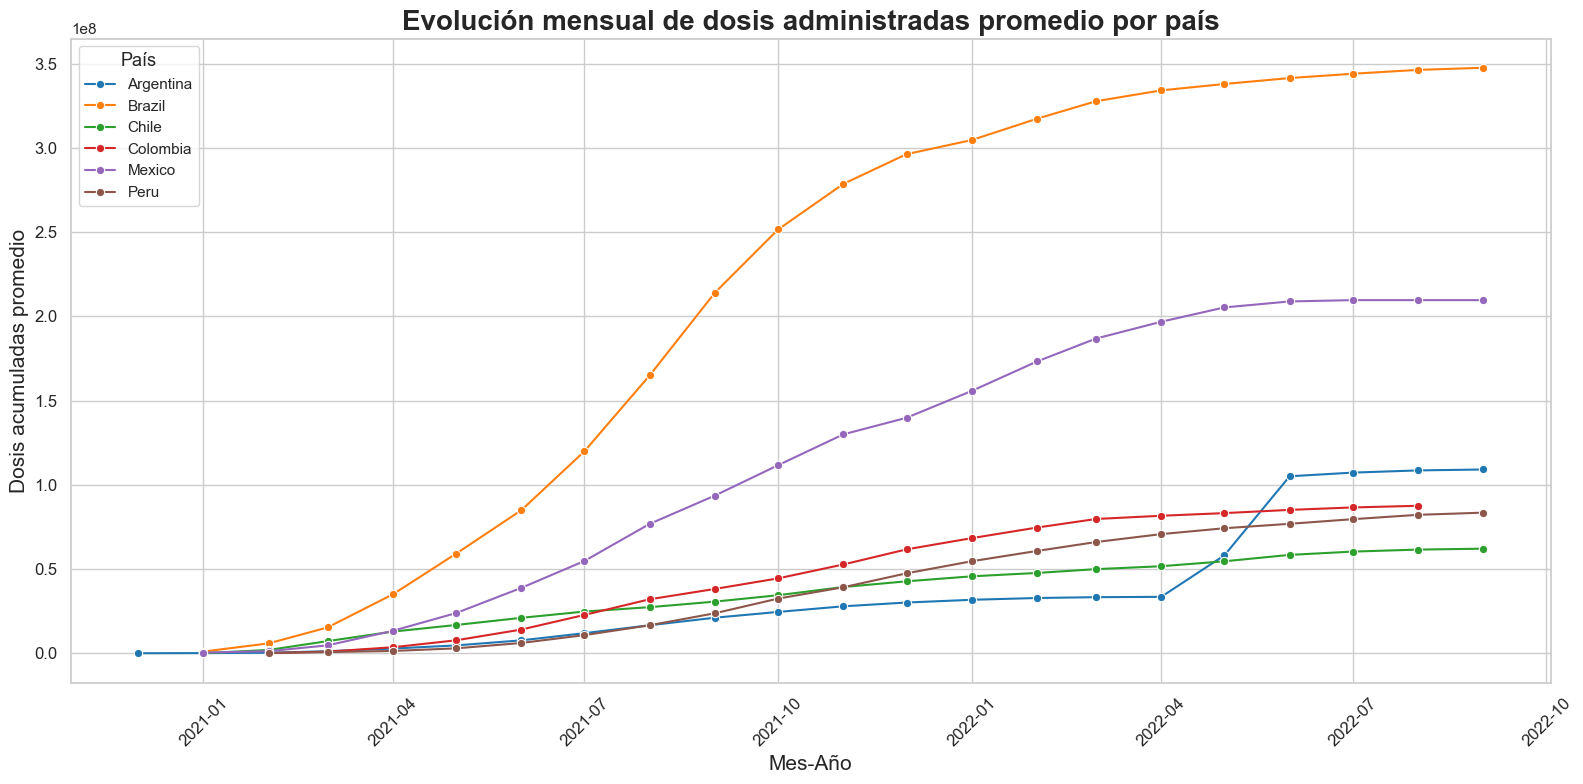

In [26]:
# Evolución de dosis administradas por mes de cada país
# Primero creamos columna mes-año
df["year_month"] = df["date"].dt.to_period("M")

# Agrupacion
dosis_mes = df.groupby(["country_name", "year_month"])["cumulative_vaccine_doses_administered"].mean().reset_index()

#Conver year_month a datetime
dosis_mes["year_month_dt"] = dosis_mes["year_month"].dt.to_timestamp()

#Asegurarse que la columna de dosis es numerica
dosis_mes["cumulative_vaccine_doses_administered"] = pd.to_numeric (
    dosis_mes["cumulative_vaccine_doses_administered"],errors="coerce"
)

#Eliminar filas con valores Nan en los campor que usaremos
dosis_mes_clean = dosis_mes.dropna(
    subset=["year_month_dt", "cumulative_vaccine_doses_administered"]
)

# graficamos
plt.figure(figsize=(16,8))
sns.lineplot(
    data=dosis_mes_clean, 
    x="year_month_dt",
    y="cumulative_vaccine_doses_administered", 
    hue="country_name", 
    marker="o",
    palette = "tab10"
)
plt.title("Evolución mensual de dosis administradas promedio por país",fontsize=20, fontweight="bold" )
plt.xlabel("Mes-Año", fontsize=15)
plt.ylabel("Dosis acumuladas promedio", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="País", title_fontsize=13, fontsize=11, loc="upper left")
plt.tight_layout()
plt.show()


El gráfico revela grandes disparidades en la cantidad total de dosis de vacunas administradas entre los países. Brasil y México lideran significativamente, mientras que Argentina, Colombia y Perú tienen un rendimiento intermedio, y Chile se encuentra por debajo de ellos en términos de dosis acumuladas totales. El gráfico de líneas es una herramienta eficaz para visualizar este tipo de crecimiento y las diferencias entre grupos a lo largo del tiempo.							

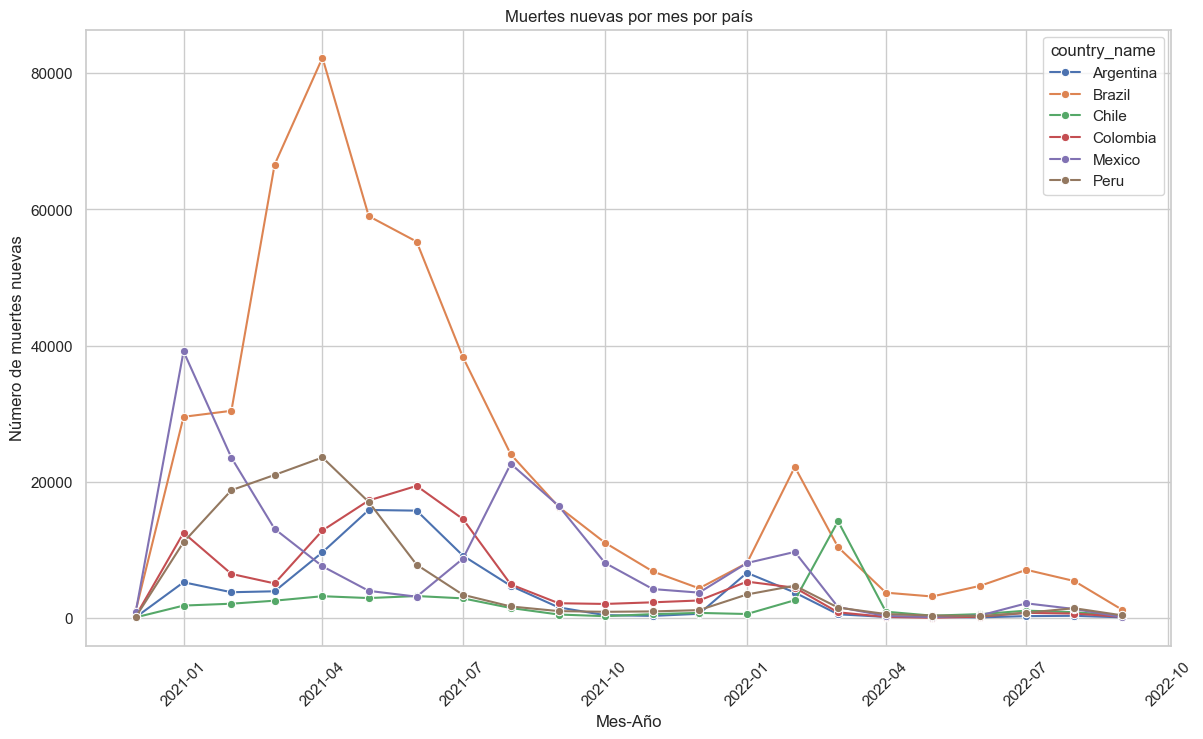

In [27]:
# Muertes por mes de cada país
muertes_mes = df.groupby(["country_name", "year_month"])["new_deceased"].sum().reset_index()

# Convertir year_month de Period a datetime para graficar mejor
muertes_mes["year_month_dt"] = muertes_mes["year_month"].dt.to_timestamp()

# Verificar que la columna de muertes sea numérica
muertes_mes["new_deceased"] = pd.to_numeric(muertes_mes["new_deceased"], errors="coerce")

# Quitar filas con valores NaN en los campos que vamos a usar
muertes_mes_clean = muertes_mes.dropna(subset=["year_month_dt", "new_deceased"])

plt.figure(figsize=(14,8))
sns.lineplot(
    data=muertes_mes_clean,
    x="year_month_dt", 
    y="new_deceased", 
    hue="country_name", 
    marker="o"
)
plt.title("Muertes nuevas por mes por país")
plt.xlabel("Mes-Año")
plt.ylabel("Número de muertes nuevas")
plt.xticks(rotation=45)
plt.show()


El gráfico muestra que la pandemia de COVID-19 tuvo un impacto de mortalidad muy diferente en cada país. Brasil experimentó el pico de muertes más alto, mientras que Argentina y México tuvieron picos significativos. Por otro lado, Colombia, Perú y Chile tuvieron picos de muertes menores en comparación. La visualización es clave para entender la intensidad y el momento de las olas de mortalidad en cada país.

Columnas: ['location_key', 'date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mort

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\652087336.py:34: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


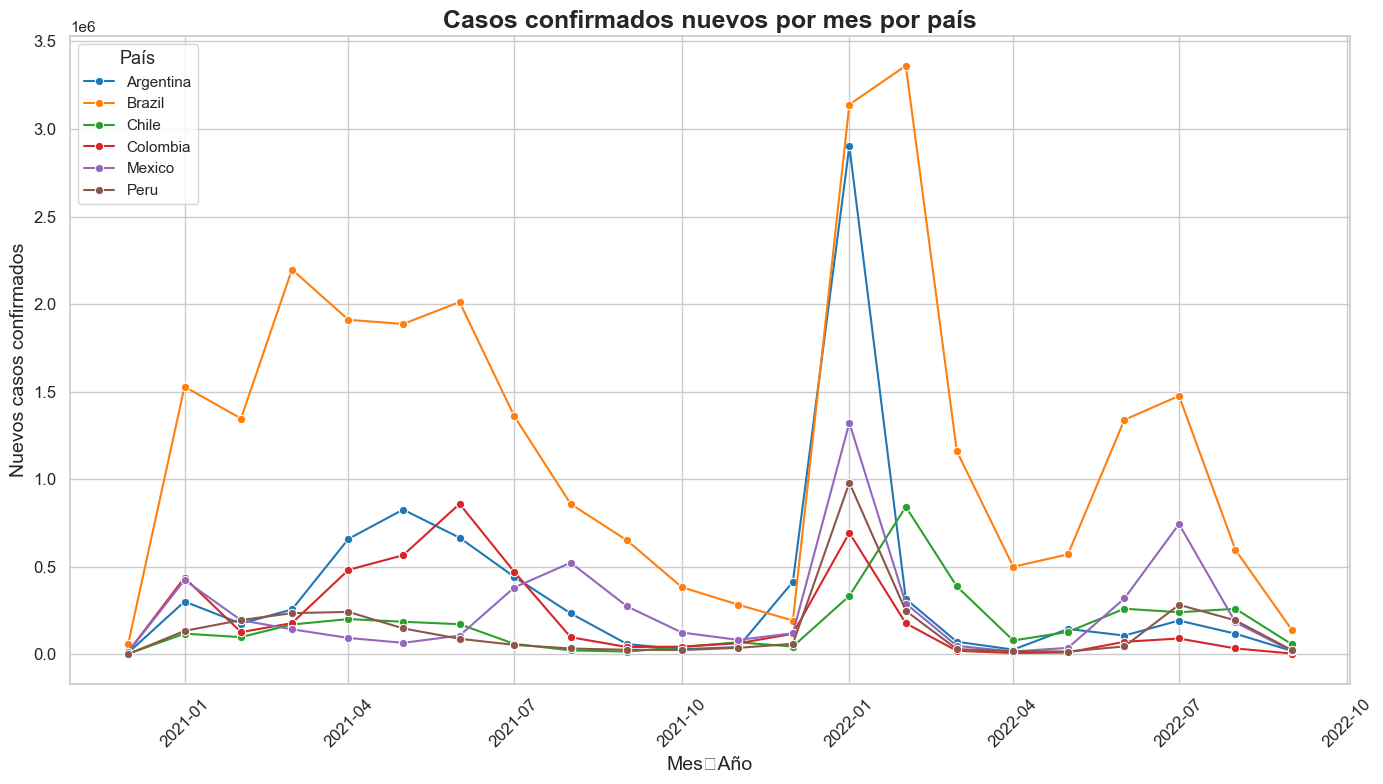

In [28]:
# Casos confirmados por mes
# Primero verifica columnas
print("Columnas:", df.columns.tolist())

# Agrupar usando nombre correcto
if "new_confirmed" in df.columns:
    casos_mes = df.groupby(["country_name", "year_month"])["new_confirmed"].sum().reset_index()
    
    # Convertir year_month a datetime si está como Period
    casos_mes["year_month_dt"] = casos_mes["year_month"].dt.to_timestamp()
    
    # Asegurar que valores sean numéricos
    casos_mes["new_confirmed"] = pd.to_numeric(casos_mes["new_confirmed"], errors="coerce")
    
    # Eliminar filas con NaN en lo que voy a graficar
    casos_mes_clean = casos_mes.dropna(subset=["year_month_dt", "new_confirmed"])
    
    # Graficar
    plt.figure(figsize=(14,8))
    sns.lineplot(
        data=casos_mes_clean,
        x="year_month_dt",
        y="new_confirmed",
        hue="country_name",
        marker="o",
        palette="tab10"
    )
    plt.title("Casos confirmados nuevos por mes por país", fontsize=18, fontweight="bold")
    plt.xlabel("Mes‑Año", fontsize=14)
    plt.ylabel("Nuevos casos confirmados", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="País", title_fontsize=13, fontsize=11, loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'new_confirmed' no existe; nombres disponibles:", df.columns.tolist())



El gráfico revela que la mayoría de los países experimentaron múltiples olas de nuevos casos. Brasil y Argentina se destacaron por tener los picos más grandes, especialmente en la gran ola de principios de 2022. Los datos de Colombia y Chile indican que sus picos de contagio fueron de menor intensidad en comparación. Este tipo de gráfico es útil para comparar la severidad y el momento de las olas de la pandemia en diferentes regiones.							


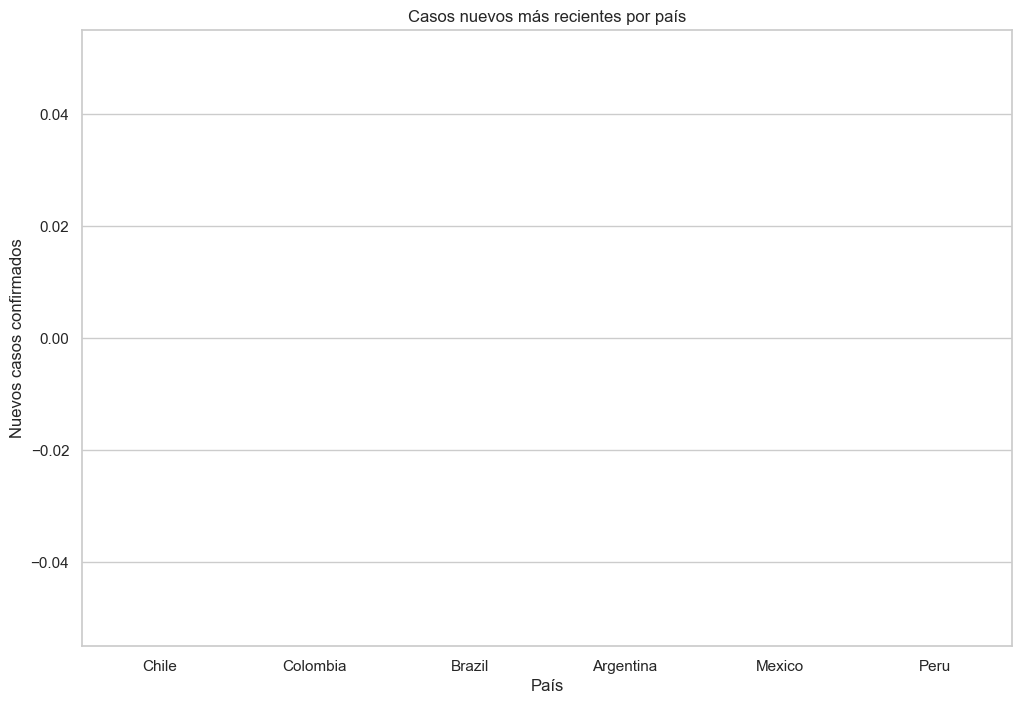

In [30]:
# Comparación del Número de Casos Nuevos entre Países (última fecha disponible por país)
ultima = df.sort_values("date").groupby("country_name").tail(1)
sns.barplot(data=ultima, x="country_name", y="new_confirmed")
plt.title("Casos nuevos más recientes por país")
plt.xlabel("País")
plt.ylabel("Nuevos casos confirmados")
plt.show()


nO MUESTRA DATOS POR QUE LA ULTIMA FECHA SE ENCUENTRA CON VALORES NAN

In [31]:
print(ultima[["country_name", "date", "new_confirmed"]])


     country_name       date  new_confirmed
1877        Chile 2022-09-17            NaN
2503     Colombia 2022-09-17            NaN
1251       Brazil 2022-09-17            NaN
625     Argentina 2022-09-17            NaN
3129       Mexico 2022-09-17            NaN
3755         Peru 2022-09-17            NaN


POR LO CUAL PALICAREMOS UN NUEVO CODIGO CON ULTIMA FECHA DISPONIBLE DE INFORMACION

     country_name       date  new_confirmed
1873        Chile 2022-09-13         1906.0
2499     Colombia 2022-09-13            0.0
621     Argentina 2022-09-13            0.0
3751         Peru 2022-09-13         1150.0
3126       Mexico 2022-09-14          631.0
1249       Brazil 2022-09-15         9931.0


C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3180777419.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


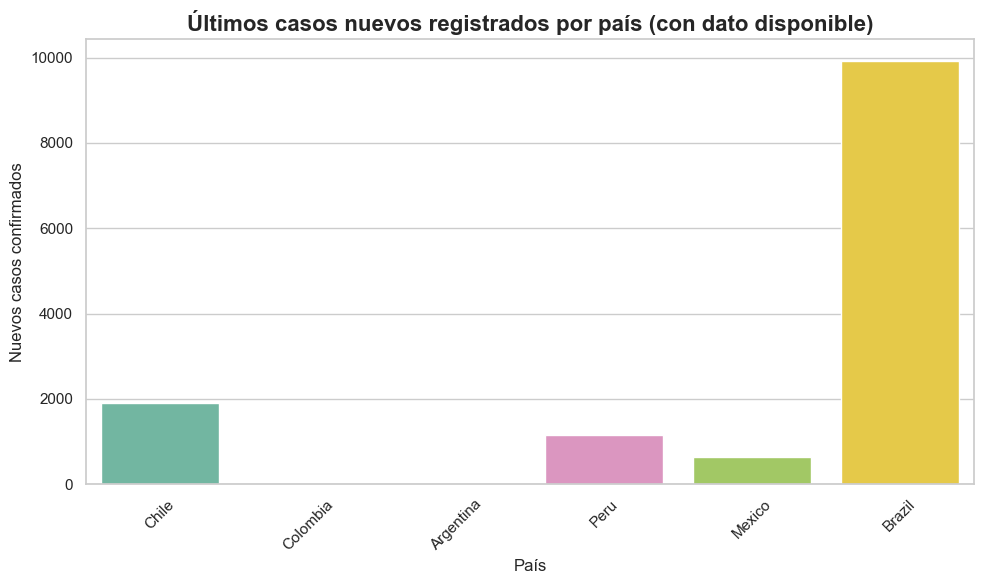

In [32]:

# Asegurar que la columna sea numérica
df["new_confirmed"] = pd.to_numeric(df["new_confirmed"], errors="coerce")

# Eliminar filas con NaN en columnas clave
df_clean = df.dropna(subset=["new_confirmed", "date", "country_name"])

# Ordenar por fecha ascendente y quedarnos con la última válida por país
ultima_con_dato = df_clean.sort_values("date").groupby("country_name", as_index=False).tail(1)

# Mostrar para verificar
print(ultima_con_dato[["country_name", "date", "new_confirmed"]])

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ultima_con_dato, 
    x="country_name", 
    y="new_confirmed", 
    palette="Set2"
)

plt.title("Últimos casos nuevos registrados por país (con dato disponible)", fontsize=16, fontweight="bold")
plt.xlabel("País")
plt.ylabel("Nuevos casos confirmados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Datos no Disponibles: El gráfico no muestra una barra para Colombia y Argentina, lo que significa que no había datos disponibles para el último registro en el momento en que se creó el gráfico.								
                             
El gráfico muestra de manera clara que, en el último día registrado, Brasil tuvo un número de nuevos casos confirmados mucho mayor que los otros países, mientras que México tuvo la cantidad más baja. La falta de datos para Colombia y Argentina impide una comparación completa.								

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\4077777663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="country_name", y="average_temperature_celsius", palette = "coolwarm")


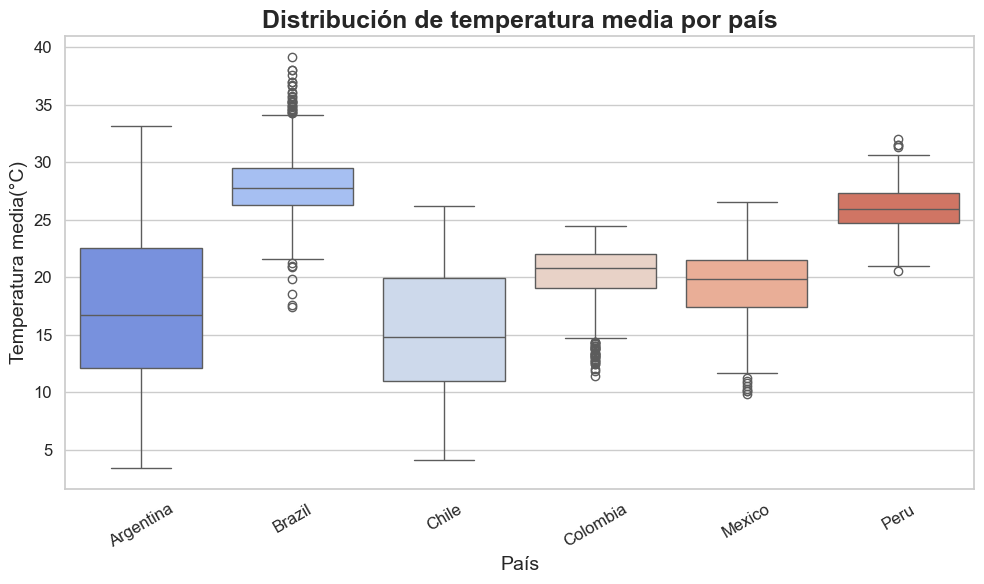

In [33]:
# Boxplot de temperatura media de cada país
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="country_name", y="average_temperature_celsius", palette = "coolwarm")
plt.title("Distribución de temperatura media por país", fontsize=18, fontweight="bold")
plt.xlabel("País", fontsize=14)
plt.ylabel("Temperatura media(°C)", fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


El gráfico de caja y bigotes es una herramienta efectiva para comparar las distribuciones de temperatura entre los países. Muestra claramente que Brasil y Perú tienen un clima más cálido en promedio, mientras que Argentina y Chile tienen climas más fríos y variables. Colombia y México tienen climas más moderados, siendo la temperatura de Colombia la más estable del grupo.

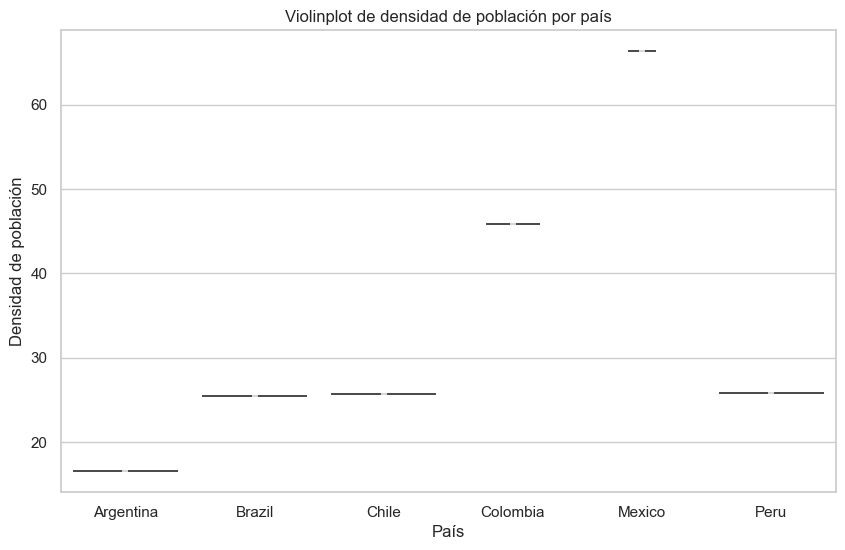

In [34]:
# Violinplot de, por ejemplo, densidad de población por país
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="country_name", y="population_density")
plt.title("Violinplot de densidad de población por país")
plt.xlabel("País")
plt.ylabel("Densidad de población")
plt.show()


El gráfico de violín es una herramienta útil para comparar cómo se distribuye la densidad de población en cada país. Muestra que Argentina tiene la densidad de población más baja y que Colombia y Perú tienen una densidad más alta, pero más consistente. Los datos de México parecen ser un valor único, lo que hace difícil interpretar la distribución.

  country_name    grupo_edad   poblacion
0    Argentina  pop_menor_80  39123066.0
1    Argentina  pop_menor_80  39123066.0
2    Argentina  pop_menor_80  39123066.0
3    Argentina  pop_menor_80  39123066.0
4    Argentina  pop_menor_80  39123066.0


C:\Users\PC\AppData\Local\Temp\ipykernel_5712\177722900.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


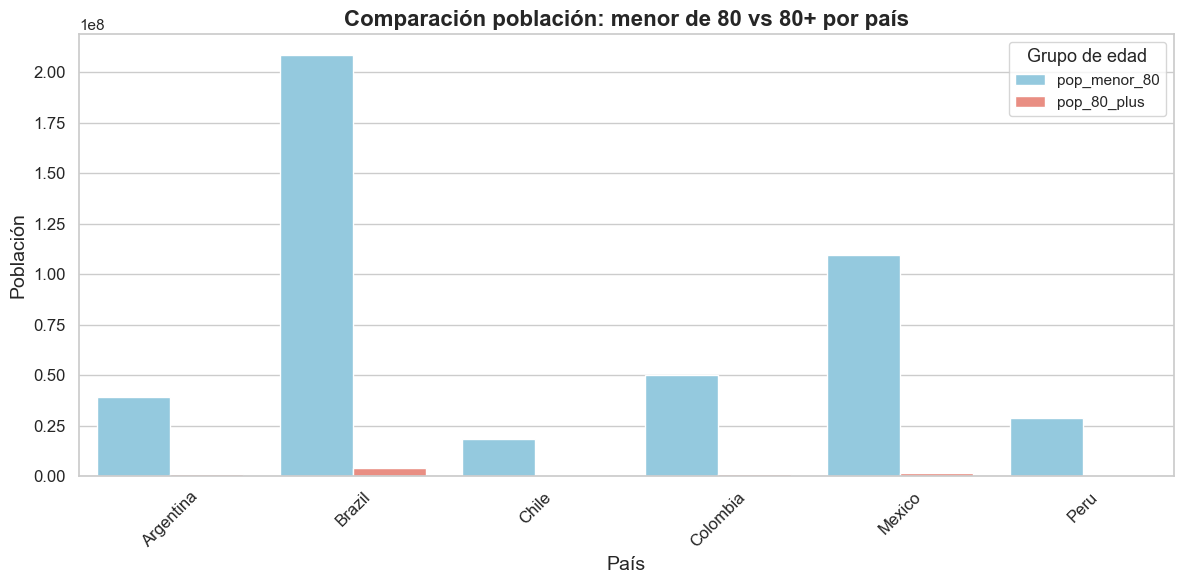

In [35]:
# Distribución de la población por grupos de edad (80+ vs menor de 80)

# Asegurar nombres limpios
df.columns = df.columns.str.strip()

# Definir rangos de edad menores de 80
rangos_menor_80 = [
    "population_age_00_09",
    "population_age_10_19",
    "population_age_20_29",
    "population_age_30_39",
    "population_age_40_49",
    "population_age_50_59",
    "population_age_60_69",
    "population_age_70_79"
]

# Verificar columnas disponibles
for col_edad in rangos_menor_80 + ["population_age_80_and_older"]:
    if col_edad not in df.columns:
        print(f"No existe la columna: {col_edad}")

# Crear columna menor de 80
df["pop_menor_80"] = df[rangos_menor_80].apply(
    lambda row: pd.to_numeric(row, errors="coerce")
).sum(axis=1)

# Crear columna de 80+
if "population_age_80_and_older" in df.columns:
    df["pop_80_plus"] = pd.to_numeric(df["population_age_80_and_older"], errors="coerce")
else:
    print("No existe la columna population_age_80_and_older")

# Preparar datos para graficar
columns_needed = ["country_name", "pop_menor_80", "pop_80_plus"]
for c in columns_needed:
    if c not in df.columns:
        print(f"Falta columna necesaria: {c}")

df_age_long = df.melt(
    id_vars=["country_name"],
    value_vars=["pop_menor_80", "pop_80_plus"],
    var_name="grupo_edad",
    value_name="poblacion"
)

# Convertir a numérico y eliminar NaN
df_age_long["poblacion"] = pd.to_numeric(df_age_long["poblacion"], errors="coerce")
df_age_long_clean = df_age_long.dropna(subset=["poblacion"])

# Verificar algunas filas
print(df_age_long_clean.head())

# Ahora graficar si todo está bien
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_age_long_clean,
    x="country_name",
    y="poblacion",
    hue="grupo_edad",
    palette=["skyblue", "salmon"],
    ci=None  # opcional, para no mostrar intervalos de confianza si no tienen sentido
)
plt.title("Comparación población: menor de 80 vs 80+ por país", fontsize=16, fontweight="bold")
plt.xlabel("País", fontsize=14)
plt.ylabel("Población", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Grupo de edad", title_fontsize=13, fontsize=11, loc="upper right")
plt.tight_layout()
plt.show()


El gráfico de barras agrupadas es una forma efectiva de visualizar y comparar la estructura demográfica de los países, mostrando que los países más poblados tienen un número de habitantes en todas las franjas de edad mucho mayor, pero que la estructura fundamental de la población (más jóvenes que ancianos) se mantiene en todos ellos.							
                            
                            
                            


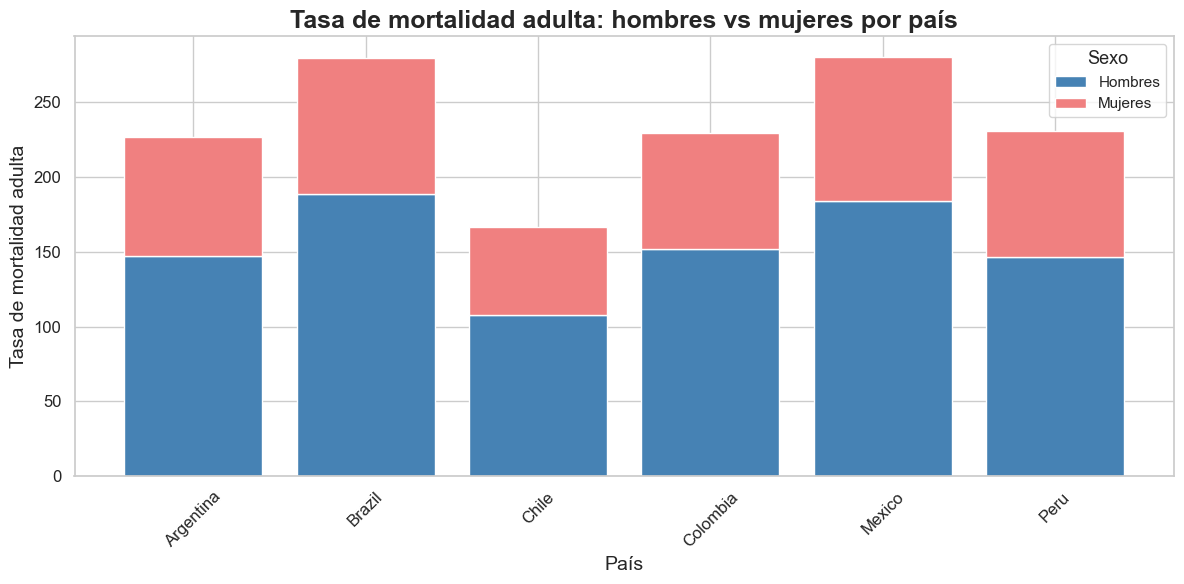

In [36]:
# Comparación de mortalidad masculina vs femenina adulta por país

# Agrupar por país: calcular el promedio o sumatorio para 'adult_male_mortality_rate' y 'adult_female_mortality_rate'
df_group = df.groupby("country_name").agg({
    "adult_male_mortality_rate": "mean",
    "adult_female_mortality_rate": "mean"
}).reset_index()

# Ahora preparas los valores
paises = df_group["country_name"]
male = df_group["adult_male_mortality_rate"]
female = df_group["adult_female_mortality_rate"]

# Crear gráfico apilado
fig, ax = plt.subplots(figsize=(12,6))

# Barra para hombres
ax.bar(paises, male, label="Hombres", color="steelblue")

# Barra para mujeres, apilada encima de la de hombres
ax.bar(paises, female, bottom=male, label="Mujeres", color="lightcoral")

# Ajustes visuales
ax.set_title("Tasa de mortalidad adulta: hombres vs mujeres por país", fontsize=18, fontweight="bold")
ax.set_xlabel("País", fontsize=14)
ax.set_ylabel("Tasa de mortalidad adulta", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Sexo", fontsize=11, title_fontsize=13)
plt.tight_layout()
plt.show()



El grafico de barras apiladas es una forma efectiva de visualizar la distribución de la mortalidad adulta por sexo. Muestra claramente que en todos los países analizados, los hombres tienen una tasa de mortalidad más alta que las mujeres. Además, revela que Brasil y México tienen las tasas de mortalidad adulta total más elevadas, mientras que Chile tiene la más baja.						
                            
                            
                            


# Identificacion de Tendencias y Patrones

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\2774677896.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_temp_cases = df_sorted.groupby("country_name").apply(lambda x: x["average_temperature_celsius"].corr(x["cases_prev_month"]))


Correlaciones temperatura media vs casos del mes siguiente por país:
country_name
Argentina    0.260884
Brazil      -0.143514
Chile        0.188505
Colombia    -0.204556
Mexico      -0.248506
Peru         0.061730
dtype: float64


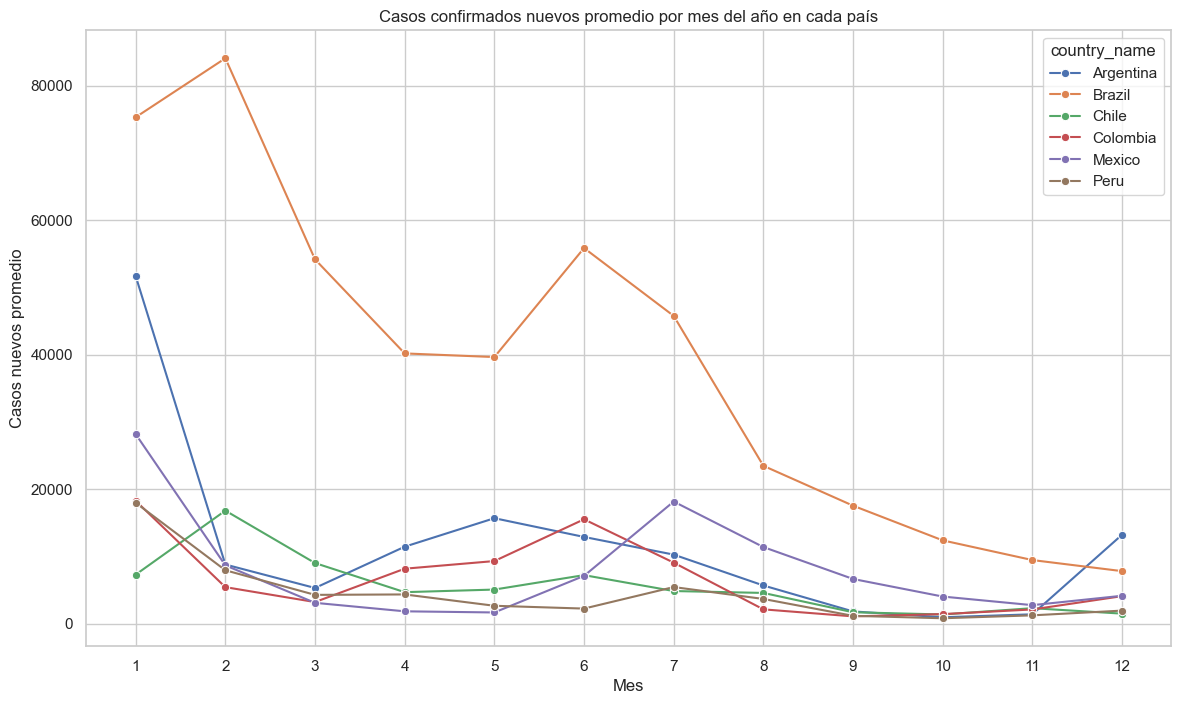

In [37]:
# 5. Identificación de Tendencias y Patrones

# Por ejemplo: explorar si la temperatura se relaciona con el número de casos con desfase temporal
# Puede que un mes más caliente o más frío afecte casos al siguiente mes. Hagamos correlaciones retrasadas.

# Crear variable de casos mes anterior
# Ordenar por país y fecha
df_sorted = df.sort_values(["country_name", "date"])

# Crear columna de casos del mes anterior
df_sorted["cases_prev_month"] = df_sorted.groupby("country_name")["new_confirmed"].shift(1)

# Correlación temperatura media actual vs casos siguiente mes por pais
corr_temp_cases = df_sorted.groupby("country_name").apply(lambda x: x["average_temperature_celsius"].corr(x["cases_prev_month"]))
print("Correlaciones temperatura media vs casos del mes siguiente por país:")
print(corr_temp_cases)

# Tendencias estacionales: promedios por mes del año
df_sorted["month"] = df_sorted["date"].dt.month
prom_cases_por_mes = df_sorted.groupby(["country_name", "month"])["new_confirmed"].mean().reset_index()
plt.figure(figsize=(14,8))
sns.lineplot(data=prom_cases_por_mes, x="month", y="new_confirmed", hue="country_name", marker="o")
plt.title("Casos confirmados nuevos promedio por mes del año en cada país")
plt.xlabel("Mes")
plt.ylabel("Casos nuevos promedio")
plt.xticks(range(1,13))
plt.show()


El gráfico revela una tendencia estacional de los casos confirmados en varios países, con picos en los primeros meses del año, especialmente en Brasil, Argentina y México. La diferencia en la magnitud de estos picos subraya el impacto variable de la pandemia en cada país. Los datos de Chile, Colombia y Perú sugieren un patrón de casos más moderado o distinto.							


In [38]:
#Lo convertimos a tabla para exportar:
corr_temp_cases = corr_temp_cases.reset_index()
corr_temp_cases.columns = ["country_name", "correlacion_temp_vs_casos_mes_siguiente"]
corr_temp_cases.to_csv("correlacion_temp_casos.csv", index=False)

#Ahora solo:
prom_cases_por_mes.to_csv("promedios_mensuales_casos.csv", index=False)



# AVANCE 3

# Importa las librerías


In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Estilo de gráficos
plt.style.use('seaborn-v0_8-whitegrid')


# Configuracion inicial

In [2]:
# Cargar los datos
ruta = r"C:\Users\PC\Documents\HENRY\MOD 4\MODULO 4\DatosFinalesFiltrados.csv"
df = pd.read_csv(ruta)

# Ver columnas para identificar si hay una de fecha
print(df.columns)

# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verificamos si hay valores nulos en la columna de fecha
print(df['date'].isnull().sum())


Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

# Analisis Exploratorios

# Análisis de tendencias, estacionalidad y patrones.
Usaremos la columna new_confirmed (nuevos casos confirmados).


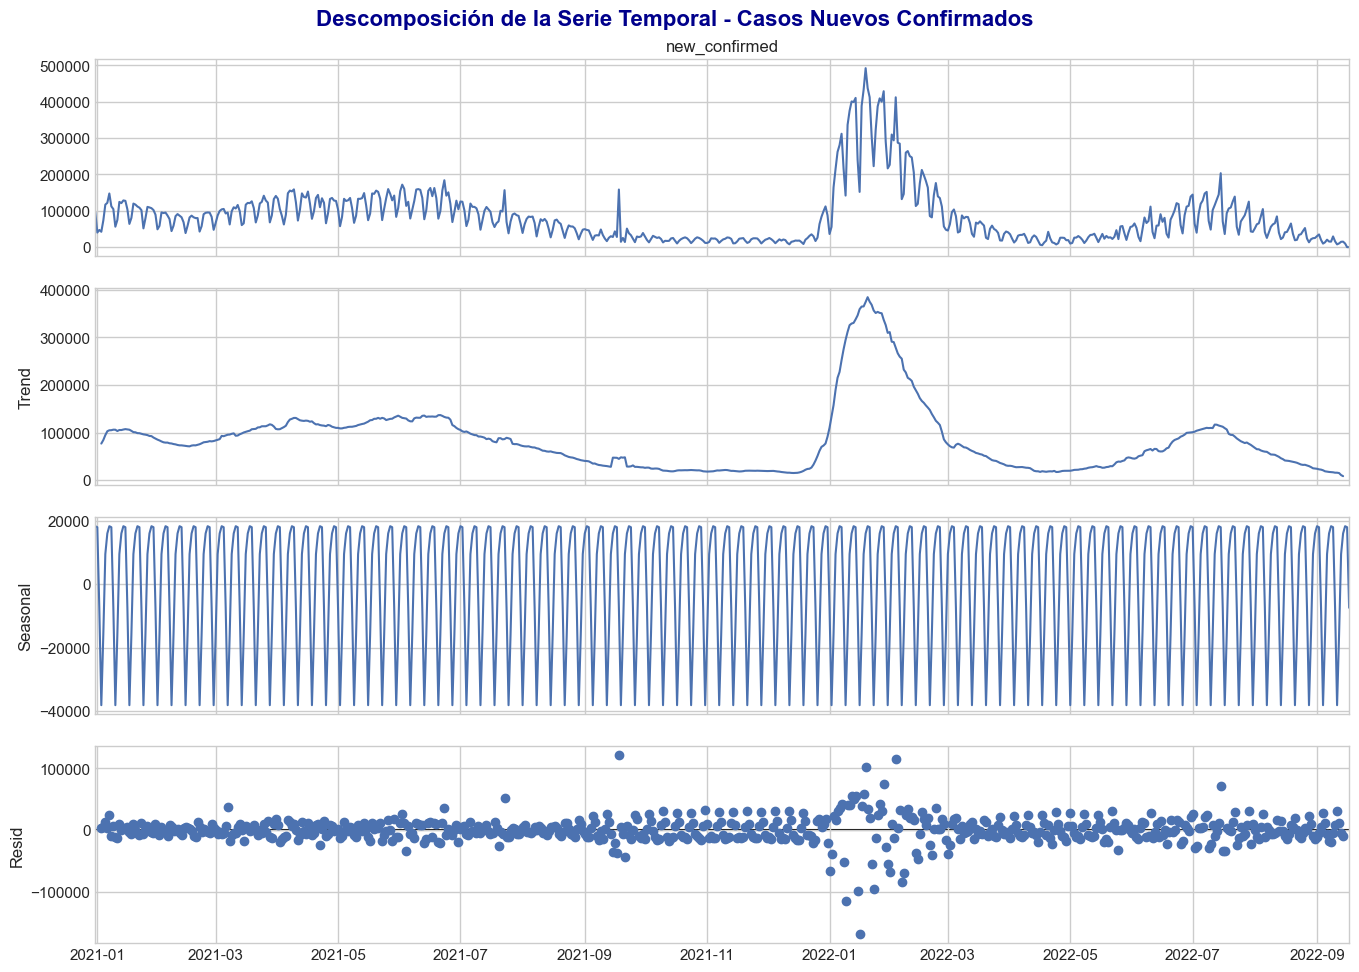

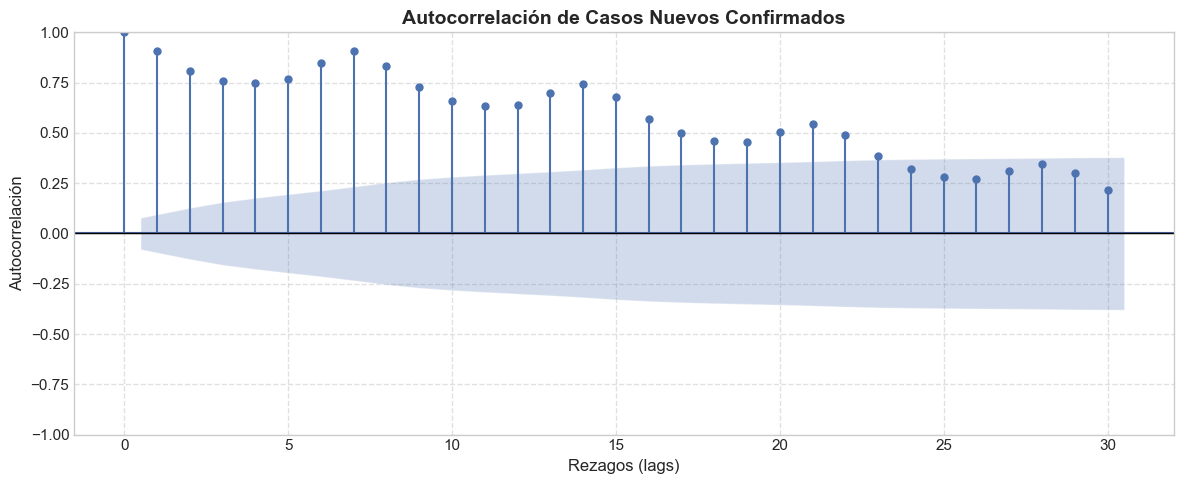

In [41]:
# Agrupar por fecha (suma global de todos los países)
casos_diarios = df.groupby('date')['new_confirmed'].sum()
# Exportarlos
casos_diarios.reset_index().to_csv("casos_diarios.csv", index=False)

# Descomposición en tendencia, estacionalidad y residuo
descomposicion = seasonal_decompose(casos_diarios, model='additive', period=7)
fig = descomposicion.plot()
fig.set_size_inches(14, 10)  # Tamaño del gráfico
plt.suptitle("Descomposición de la Serie Temporal - Casos Nuevos Confirmados",
            fontsize=16, fontweight='bold', color='darkblue')

# Ajustar espacio superior para no solapar el título
plt.subplots_adjust(top=0.93)

plt.show()

# Autocorrelación (para ver patrones repetidos):
fig, ax = plt.subplots(figsize = (12,5))
plot_acf(casos_diarios.dropna(), lags=30, ax=ax)
ax.set_title("Autocorrelación de Casos Nuevos Confirmados", fontsize=14, fontweight='bold')
ax.set_xlabel("Rezagos (lags)", fontsize=12)
ax.set_ylabel("Autocorrelación", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.show()


El gráfico "Descomposición de la Serie Temporal -Casos Nueos Confirmados" revela que los datos de casos confirmados están influenciados por una tendencia de crecimiento y disminución, un patrón semanal claro y un componente aleatorio que captura eventos o comportamientos que no se ajustan a los otros dos componentes. La ola de principios de 2022 fue un evento significativo que se refleja tanto en la tendencia como en los residuos.							


El gráfico "Aurocorrelación de Casos Nuevos Confirmados" muestra que la serie de tiempo de casos nuevos confirmados no es aleatoria. Los datos tienen una fuerte dependencia de los valores pasados y, lo que es más importante, tienen un patrón de estacionalidad semanal muy claro. Este tipo de análisis es fundamental para el modelado de series de tiempo, ya que confirma la necesidad de tener en cuenta la dependencia y la estacionalidad en cualquier pronóstico futuro.

# Generación de Graficos

# Evolución de Casos Activos vs. Recuperados .     
Usamos new_confirmed (casos nuevos) y new_recovered (recuperados nuevos) por fecha.


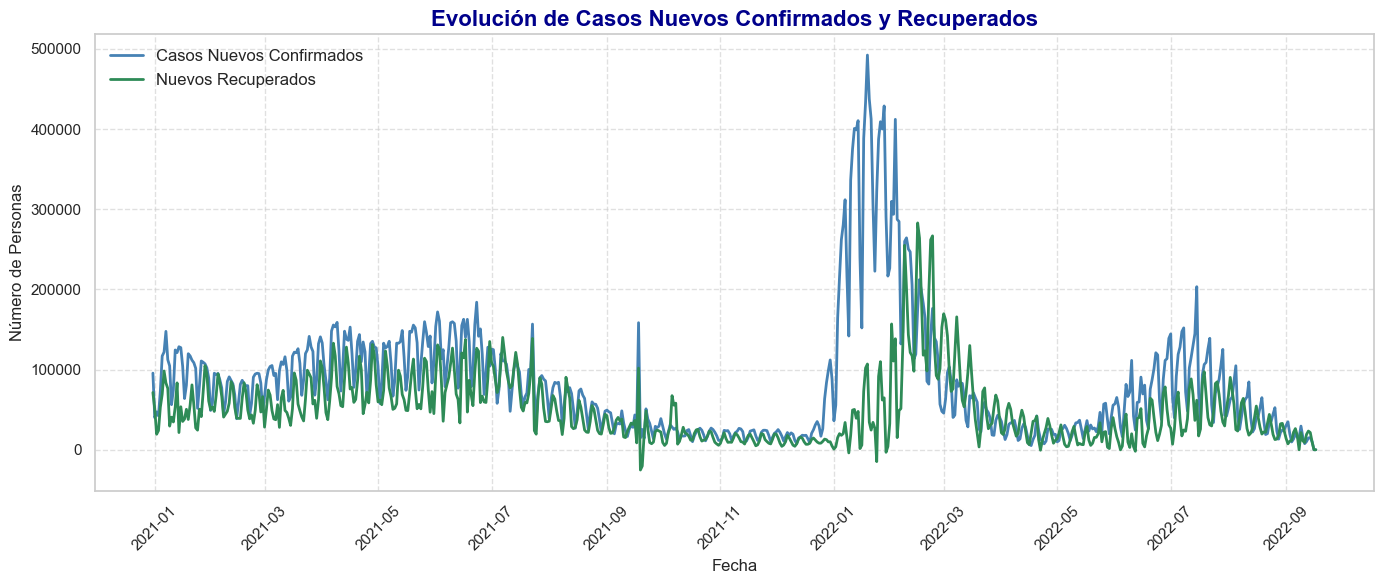

In [42]:
# Estilo visual general
sns.set_theme(style="whitegrid")

# Agrupamos por fecha
evolucion = df.groupby('date')[['new_confirmed', 'new_recovered']].sum()

# Crear gráfico personalizado
fig, ax = plt.subplots(figsize=(14, 6))  # Tamaño del gráfico

# Graficar ambas series con estilos
ax.plot(evolucion.index, evolucion['new_confirmed'], label='Casos Nuevos Confirmados', color='steelblue', linewidth=2)
ax.plot(evolucion.index, evolucion['new_recovered'], label='Nuevos Recuperados', color='seagreen', linewidth=2)

# Título y etiquetas
ax.set_title("Evolución de Casos Nuevos Confirmados y Recuperados", fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Número de Personas", fontsize=12)

# Estética de ejes y rejilla
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)

# Leyenda
ax.legend(loc='upper left', fontsize=12)

# Ajuste final
plt.tight_layout()
plt.show()


El gráfico es una clara representación de cómo la pandemia de COVID-19 se comportó en 2021 y 2022, mostrando la aparición de una oleada masiva de contagios a principios de 2022 (la ola de ómicron) y el posterior regreso a niveles mucho más bajos.

# Evolución de Casos Activos vs. Recuperados por País

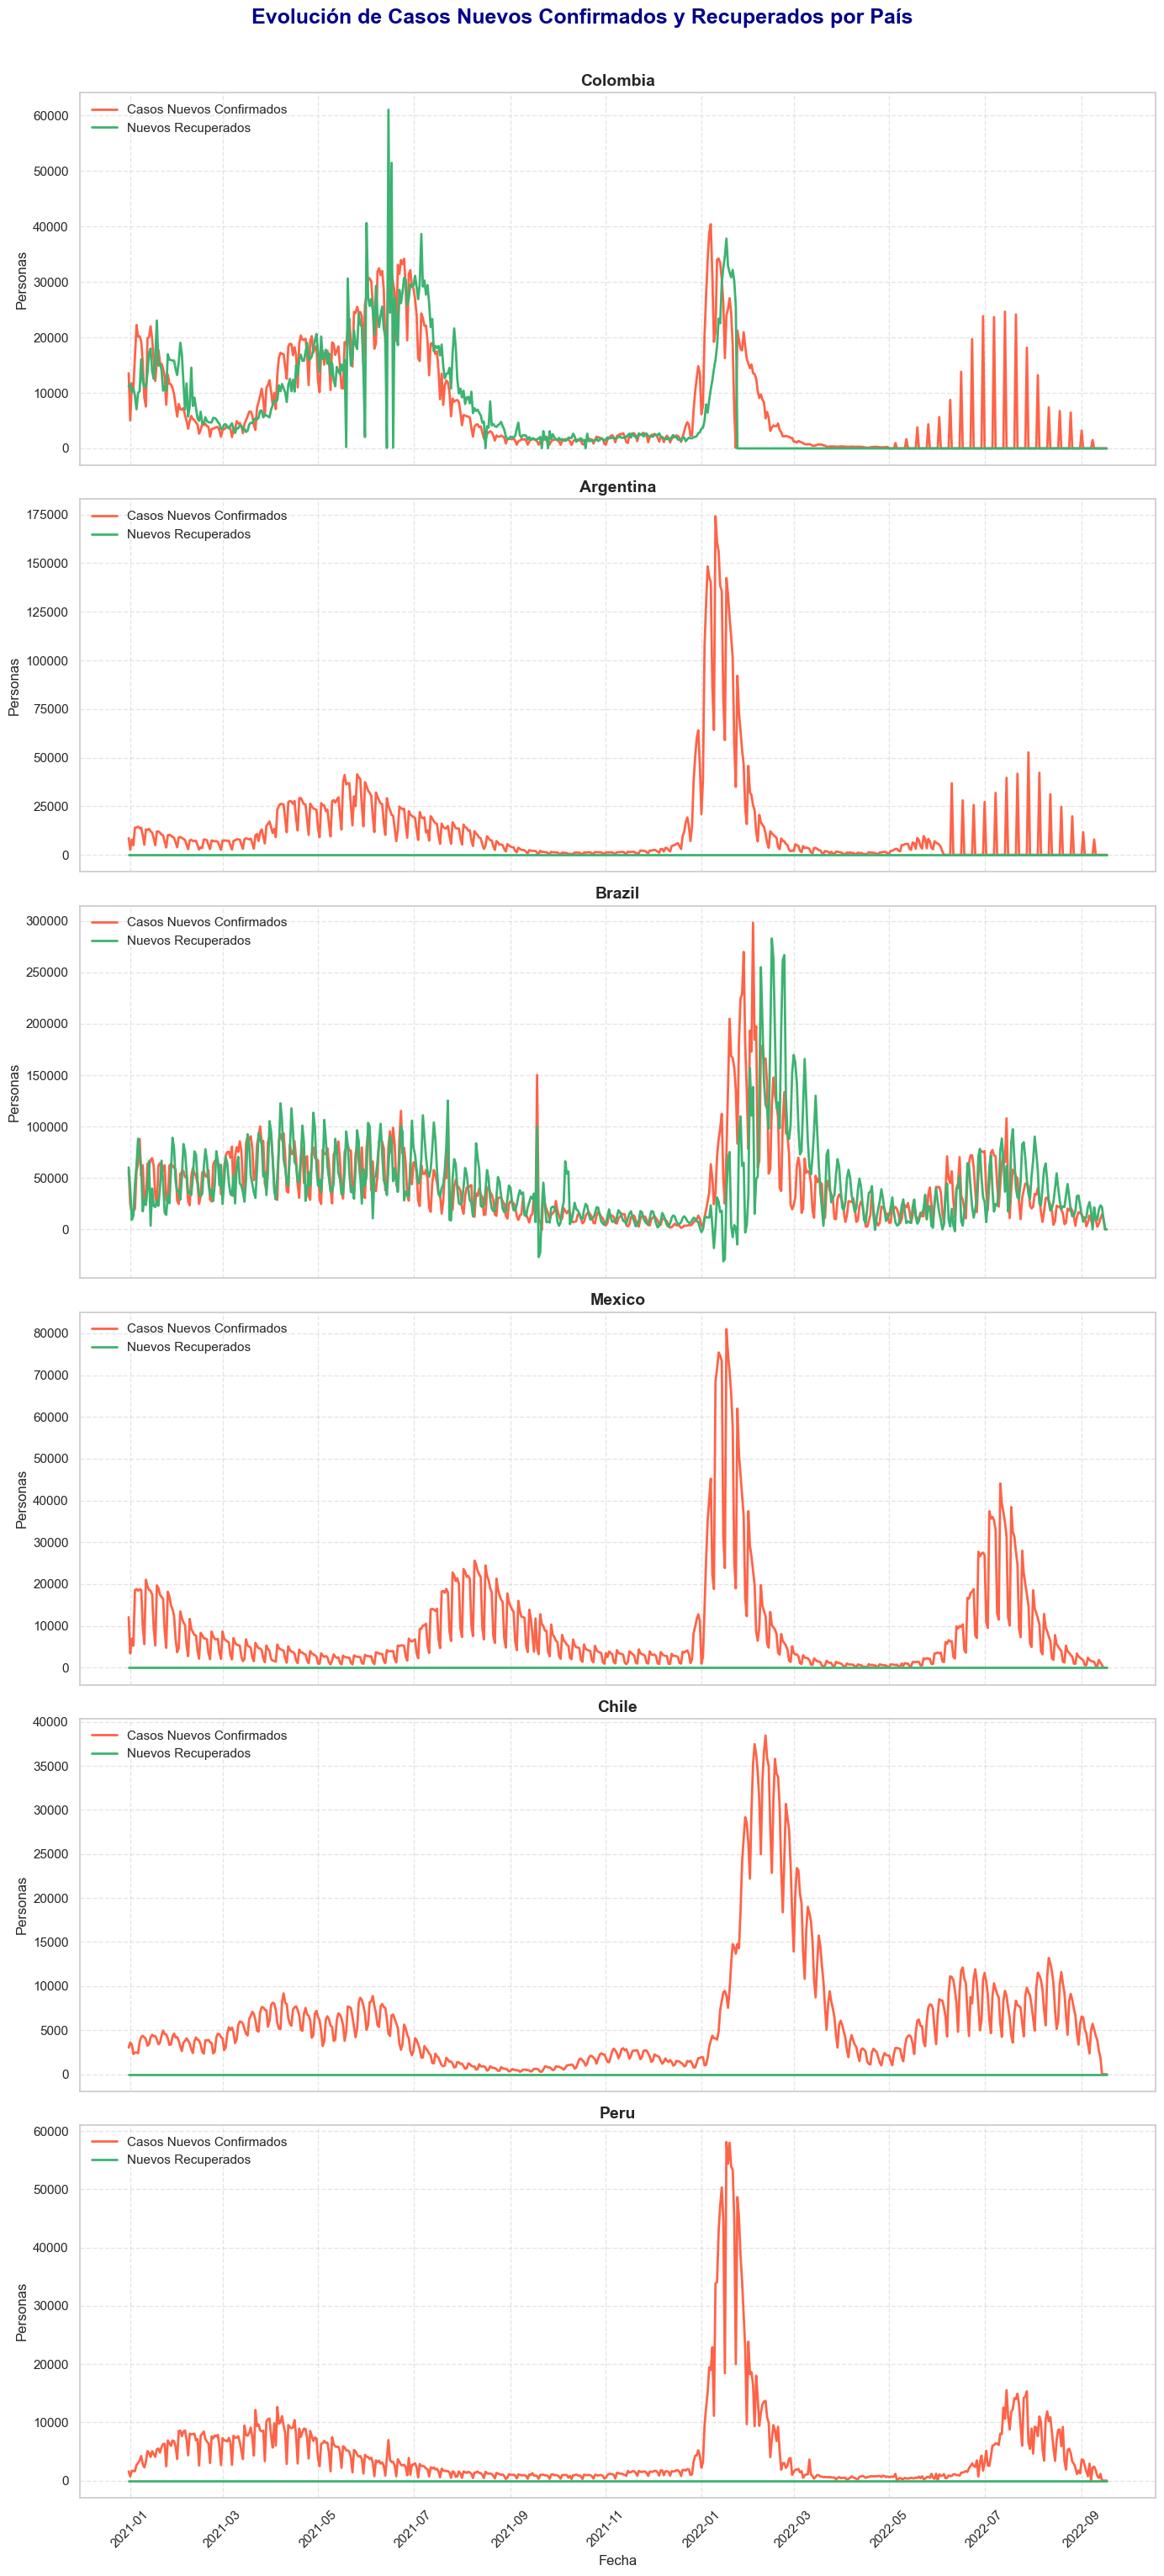

In [44]:
# Estilo de gráficos
sns.set_theme(style="whitegrid")

# Agrupar por país y fecha
evolucion_paises = df.groupby(['country_name', 'date'])[['new_confirmed', 'new_recovered']].sum().reset_index()

# Lista de países que queremos comparar
paises = ['Colombia','Argentina', 'Brazil', 'Mexico', 'Chile', 'Peru'] 

# Número de subplots
num_paises = len(paises)
fig, axes = plt.subplots(num_paises, 1, figsize=(14, 5 * num_paises), sharex=True)

# Si solo hay un país, `axes` no es iterable, lo convertimos en lista
if num_paises == 1:
    axes = [axes]

# Graficar por país
for i, pais in enumerate(paises):
    ax = axes[i]
    datos_pais = evolucion_paises[evolucion_paises['country_name'] == pais]

    ax.plot(datos_pais['date'], datos_pais['new_confirmed'], label='Casos Nuevos Confirmados', color='tomato', linewidth=2)
    ax.plot(datos_pais['date'], datos_pais['new_recovered'], label='Nuevos Recuperados', color='mediumseagreen', linewidth=2)

    ax.set_title(f"{pais}", fontsize=14, fontweight='bold')
    ax.set_ylabel("Personas")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper left')

# Etiqueta global en el eje X
axes[-1].set_xlabel("Fecha")
plt.xticks(rotation=45)

# Espaciado automático
plt.tight_layout()
plt.suptitle("Evolución de Casos Nuevos Confirmados y Recuperados por País",
             fontsize=18, fontweight='bold', color='darkblue', y=1.02)

plt.show()


Los gráficos demuestran que todos los países sufrieron los efectos de la pandemia, con picos de contagio que variaron en magnitud y tiempo. La oleada de la variante Ómicron a principios de 2022 es visible en casi todos los países con un pico de contagios masivo. Sin embargo, una diferencia crucial es la calidad y consistencia del registro de datos de recuperaciones. Mientras que en Colombia el reporte de recuperados y confirmados parece estar sincronizado, en la mayoría de los otros países (Argentina, México, Chile y Perú) los datos de recuperaciones son inconsistentes o muy bajos en comparación con los casos confirmados, lo que limita la capacidad de hacer un análisis completo de la dinámica de la enfermedad y su impacto real.														

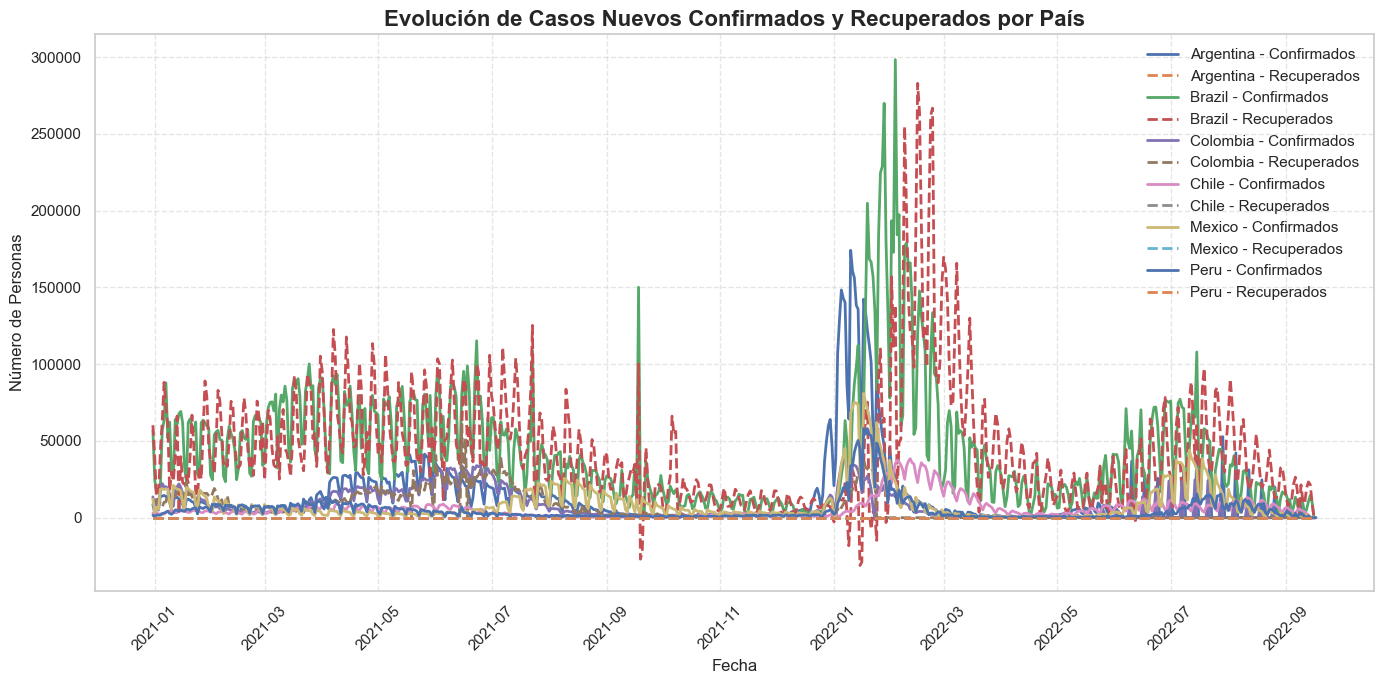

In [45]:
# Lista más pequeña para evitar sobrecarga visual
paises = ['Argentina', 'Brazil','Colombia','Chile','Mexico', 'Peru']

plt.figure(figsize=(14, 7))

for pais in paises:
    datos_pais = evolucion_paises[evolucion_paises['country_name'] == pais]
    
    # Casos nuevos
    plt.plot(datos_pais['date'], datos_pais['new_confirmed'],
             label=f"{pais} - Confirmados", linewidth=2)
    
    # Recuperados
    plt.plot(datos_pais['date'], datos_pais['new_recovered'],
             label=f"{pais} - Recuperados", linewidth=2, linestyle='--')

plt.title("Evolución de Casos Nuevos Confirmados y Recuperados por País", fontsize=16, fontweight='bold')
plt.xlabel("Fecha")
plt.ylabel("Número de Personas")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Patrón Común: Todos los países analizados exhiben un patrón similar, con un pico masivo de casos confirmados (líneas continuas) a principios de 2022. Esto sugiere una posible ola de contagios generalizada en la región.					
           
Recuperaciones: En todos los países, los picos de casos recuperados (líneas discontinuas) siguen de cerca a los picos de casos confirmados, lo que indica que, a pesar del aumento en las infecciones, una gran proporción de personas se estaba recuperando.					
             
Recuperaciones Negativas: El gráfico muestra valores negativos para "recuperaciones" en algunos momentos. Esto podría ser un error en la presentación de los datos o una convención utilizada en la fuente, pero no es un valor real. En la práctica, el número de recuperados no puede ser negativo.					


# Tasa de Crecimiento

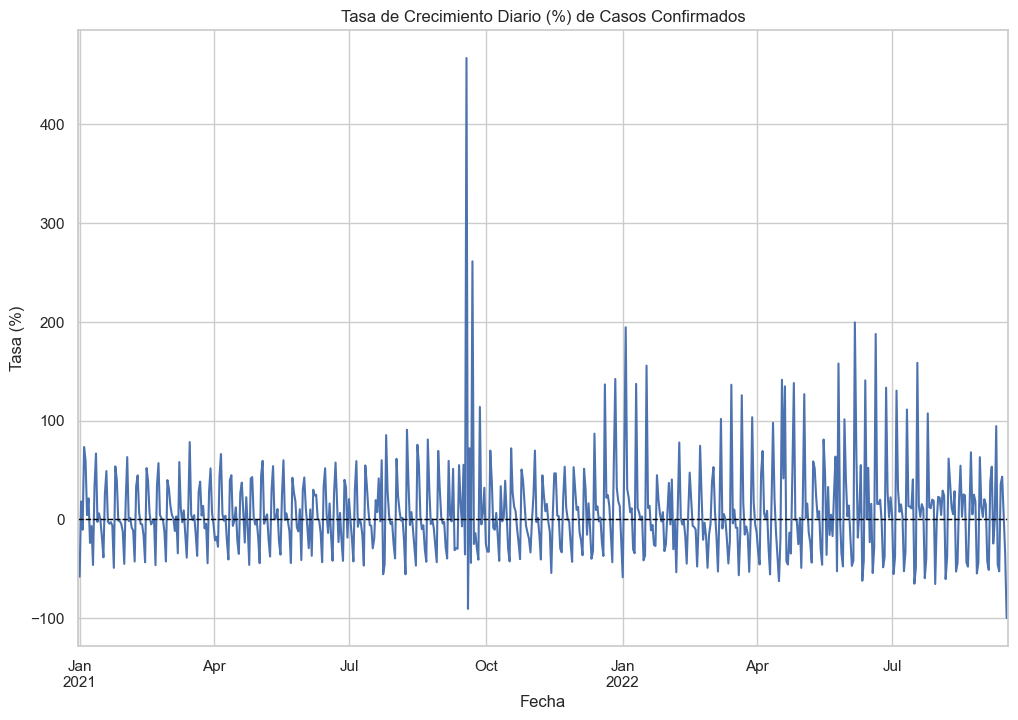

In [46]:
# Tasa de crecimiento diaria
casos_diarios = df.groupby('date')['new_confirmed'].sum()
tasa_crecimiento = casos_diarios.pct_change() * 100

# Para tasa crecimiento, mejor combinar en un DF
df_tasa = pd.DataFrame({
    "date": casos_diarios.index,
    "tasa_crecimiento": tasa_crecimiento.values
})
df_tasa.to_csv("tasa_crecimiento_diaria.csv", index=False)

# Graficar
tasa_crecimiento.plot()
plt.title("Tasa de Crecimiento Diario (%) de Casos Confirmados")
plt.xlabel("Fecha")
plt.ylabel("Tasa (%)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


El gráfico de la tasa de crecimiento diario es una herramienta útil para identificar la dinámica a corto plazo de los casos confirmados. Muestra que el número de casos es muy variable día a día, con picos extremos que reflejan tanto la realidad de los brotes como las fluctuaciones en el reporte de datos.					


# Tasa de crecimiento por pais

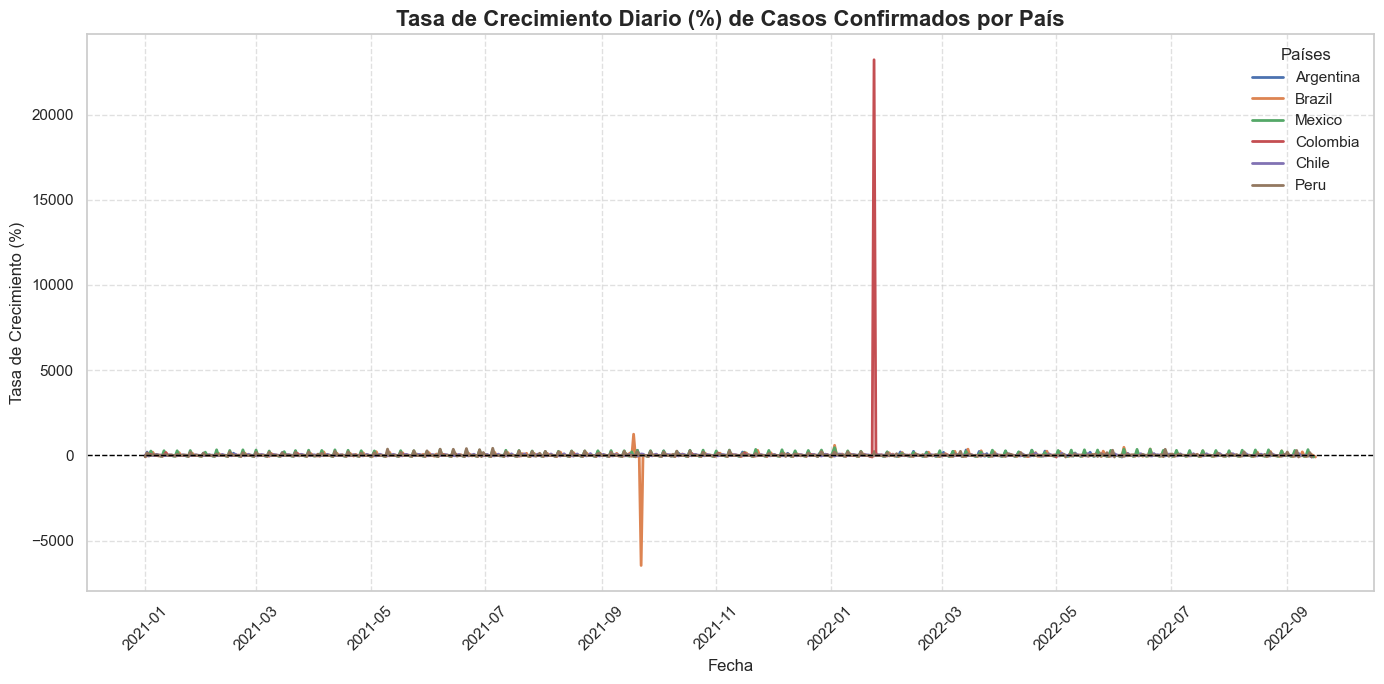

In [48]:
# Estilo
sns.set_theme(style="whitegrid")

# Agrupar por país y fecha
df_pais = df.groupby(['country_name', 'date'])['new_confirmed'].sum().reset_index()

# Lista de países a analizar
paises = ['Argentina', 'Brazil', 'Mexico', 'Colombia', 'Chile', 'Peru'] 

# Crear figura
plt.figure(figsize=(14, 7))

# Calcular y graficar la tasa de crecimiento para cada país
for pais in paises:
    datos_pais = df_pais[df_pais['country_name'] == pais].copy()
    datos_pais['tasa_crecimiento'] = datos_pais['new_confirmed'].pct_change() * 100

    # Graficar
    plt.plot(datos_pais['date'], datos_pais['tasa_crecimiento'], label=pais, linewidth=2)

# Personalización del gráfico
plt.title("Tasa de Crecimiento Diario (%) de Casos Confirmados por País", fontsize=16, fontweight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Tasa de Crecimiento (%)", fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.legend(title="Países")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


El gráfico es útil para ver la dinámica de crecimiento de los casos por país, pero su principal mensaje es la importancia de ser cauteloso con los datos diarios. El pico de Colombia a principios de 2022 es un claro ejemplo de cómo una anomalía en el registro puede distorsionar un gráfico, haciendo que sea necesario un análisis más profundo para entender la causa real de un cambio tan abrupto.														
							


# Relación entre la Cobertura de Vacunación y la Reducción de Casos.        
Usamos cumulative_vaccine_doses_administered y new_confirmed


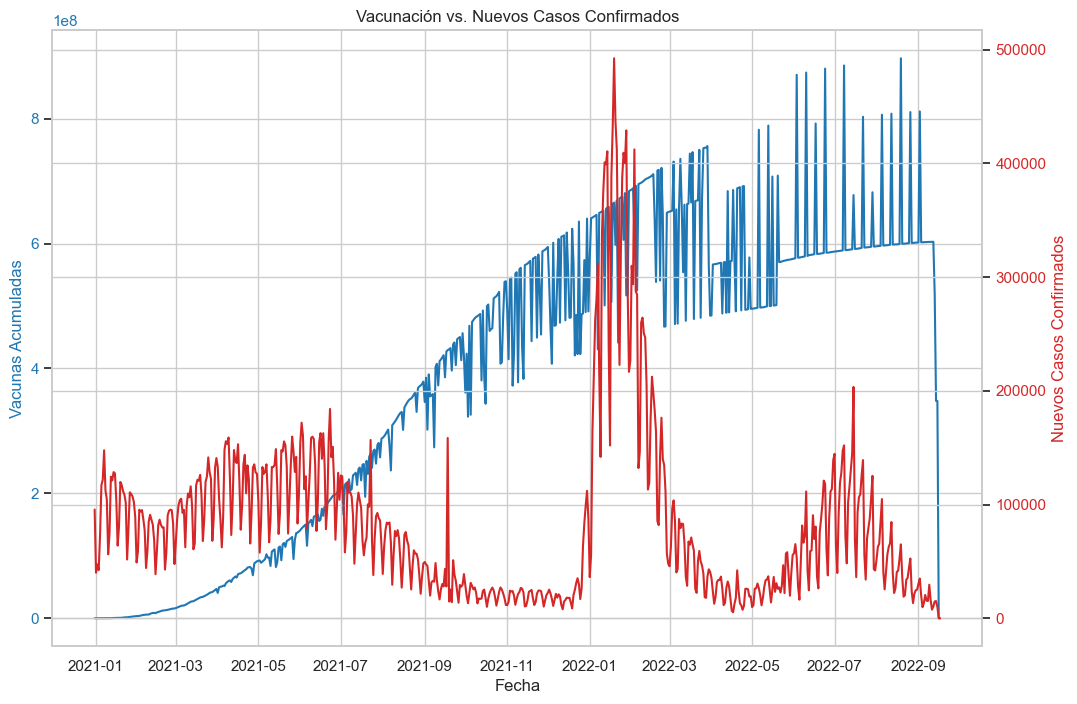

In [49]:
# Agrupación por fecha
vacunas_casos = df.groupby('date')[['cumulative_vaccine_doses_administered', 'new_confirmed']].sum()

# Vacunación vs casos
vacunas_casos.reset_index().to_csv("vacunas_casos_diarios.csv", index=False)

# Gráfico con dos ejes
fig, ax1 = plt.subplots()

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Vacunas Acumuladas', color='tab:blue')
ax1.plot(vacunas_casos.index, vacunas_casos['cumulative_vaccine_doses_administered'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Nuevos Casos Confirmados', color='tab:red')
ax2.plot(vacunas_casos.index, vacunas_casos['new_confirmed'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Vacunación vs. Nuevos Casos Confirmados")
plt.show()


Impacto de la Vacunación: Aunque la vacunación no eliminó por completo los casos, se puede observar una desconexión entre las grandes olas de casos y la mortalidad o gravedad de la enfermedad en poblaciones altamente vacunadas. El gráfico, por sí solo, no muestra la gravedad de los casos, pero en general, un alto índice de vacunación contribuye a reducir las hospitalizaciones y muertes.														
                                                  
La última caída de casos en 2022 coincide con un alto nivel de vacunación acumulada, sugiriendo que la inmunidad poblacional, ya sea por vacunación o por infección previa, ayudó a disminuir la propagación y la severidad del virus.														


# Relación entre la Cobertura de Vacunación y la Reducción de Casos por Pais

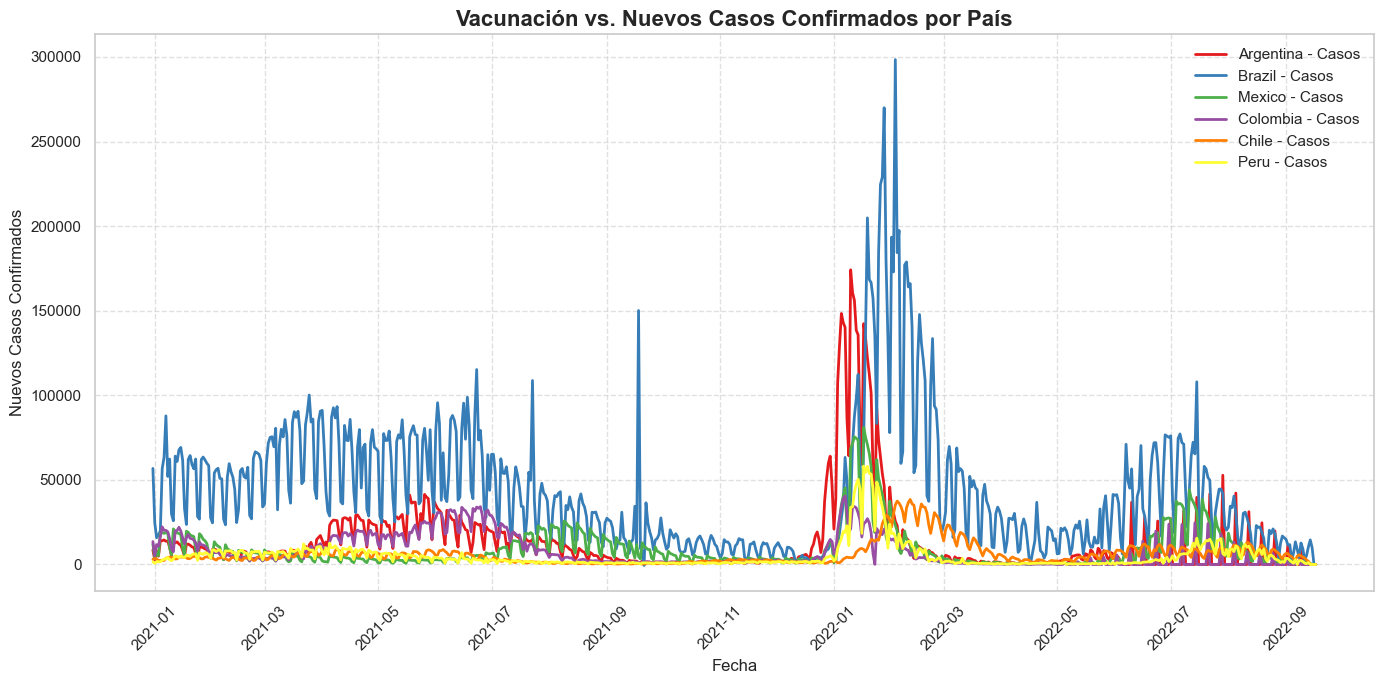

In [50]:
# Estilo general
sns.set_theme(style="whitegrid")

# Agrupación por país y fecha
vacunas_casos_pais = df.groupby(['country_name', 'date'])[
    ['cumulative_vaccine_doses_administered', 'new_confirmed']
].sum().reset_index()

# Lista de países a visualizar
paises = ['Argentina', 'Brazil', 'Mexico', 'Colombia', 'Chile', 'Peru'] 

# Filtrar los datos del país
datos_paises = vacunas_casos_pais[vacunas_casos_pais['country_name']. isin(paises)].copy()

# Ordenar por país y fecha
datos_paises = datos_paises.sort_values(by=['country_name', 'date'])

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 7))

# Colores alternados para casos
colores = sns.color_palette("Set1", n_colors=len(paises))

# Graficar: solo nuevos casos (eje izquierdo) para cada país
for i, pais in enumerate(paises):
    datos = datos_paises[datos_paises['country_name'] == pais]
    ax.plot(datos['date'], datos['new_confirmed'], label=f'{pais} - Casos', color=colores[i], linewidth=2)

# Personalización
ax.set_title("Vacunación vs. Nuevos Casos Confirmados por País", fontsize=16, fontweight='bold')
ax.set_xlabel("Fecha")
ax.set_ylabel("Nuevos Casos Confirmados")
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()

En resumen, el gráfico ilustra cómo la pandemia afectó de manera similar a la región, con olas de casos que subían y bajaban, pero con variaciones en la magnitud y el momento entre los países. La ola de principios de 2022, probablemente impulsada por la variante Ómicron, fue la más grande y generalizada de todas las mostradas.														
                                                        									


# Progreso de la vacunación por país.         
Grafica de dosis administradas acumuladas por país a lo largo del tiempo.

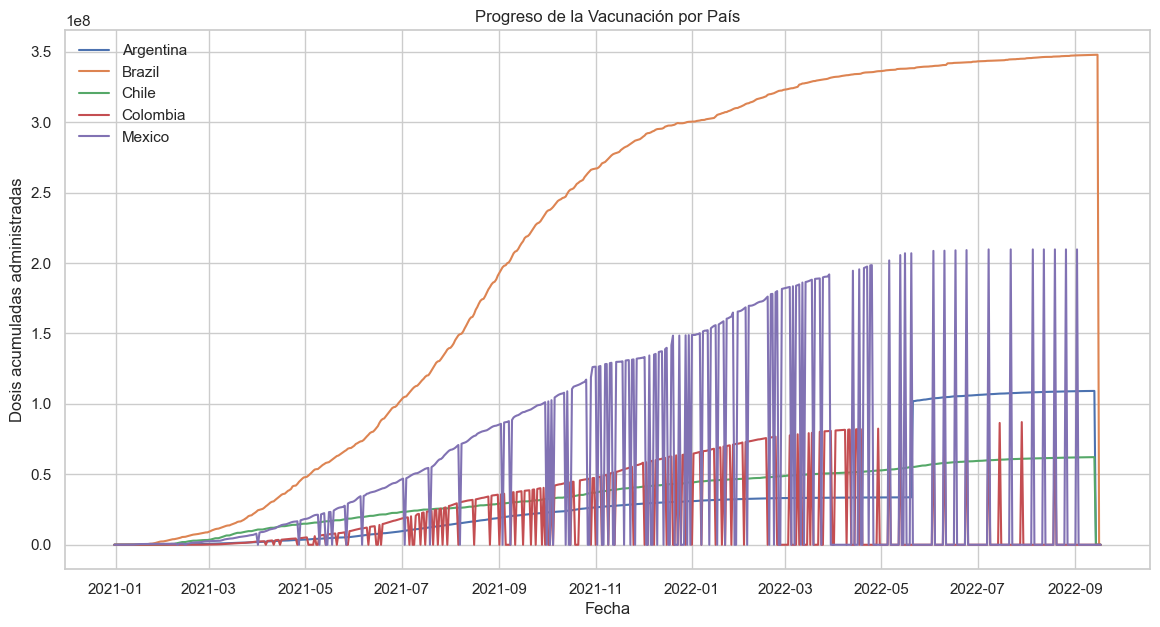

In [51]:
# Tomar algunos países de ejemplo, o todos si no hay muchos
paises = df['country_name'].unique()  

# Si hay muchos países, filtrar los más importantes
top_paises = df['country_name'].value_counts().nlargest(5).index.tolist()

df_filtrado = df[df['country_name'].isin(top_paises)]

vacunacion_pais = df_filtrado.groupby(['date', 'country_name'])['cumulative_vaccine_doses_administered'].sum().reset_index()

# Vacunación por país
vacunacion_pais.to_csv("vacunacion_por_pais.csv", index=False)

# Plot
plt.figure(figsize=(14,7))
for pais in top_paises:
    df_p = vacunacion_pais[vacunacion_pais['country_name']==pais]
    plt.plot(df_p['date'], df_p['cumulative_vaccine_doses_administered'], label=pais)

plt.title("Progreso de la Vacunación por País")
plt.xlabel("Fecha")
plt.ylabel("Dosis acumuladas administradas")
plt.legend()
plt.show()



Este gráfico muestra la disparidad en la implementación y el progreso de los programas de vacunación en América Latina. La tendencia general fue un rápido aumento en 2021, seguido de un crecimiento más lento a medida que se alcanzaba una mayor cobertura poblacional.						


# Nuevos casos y temperatura promedio.     
Relacionar new_confirmed con average_temperature_celsius.

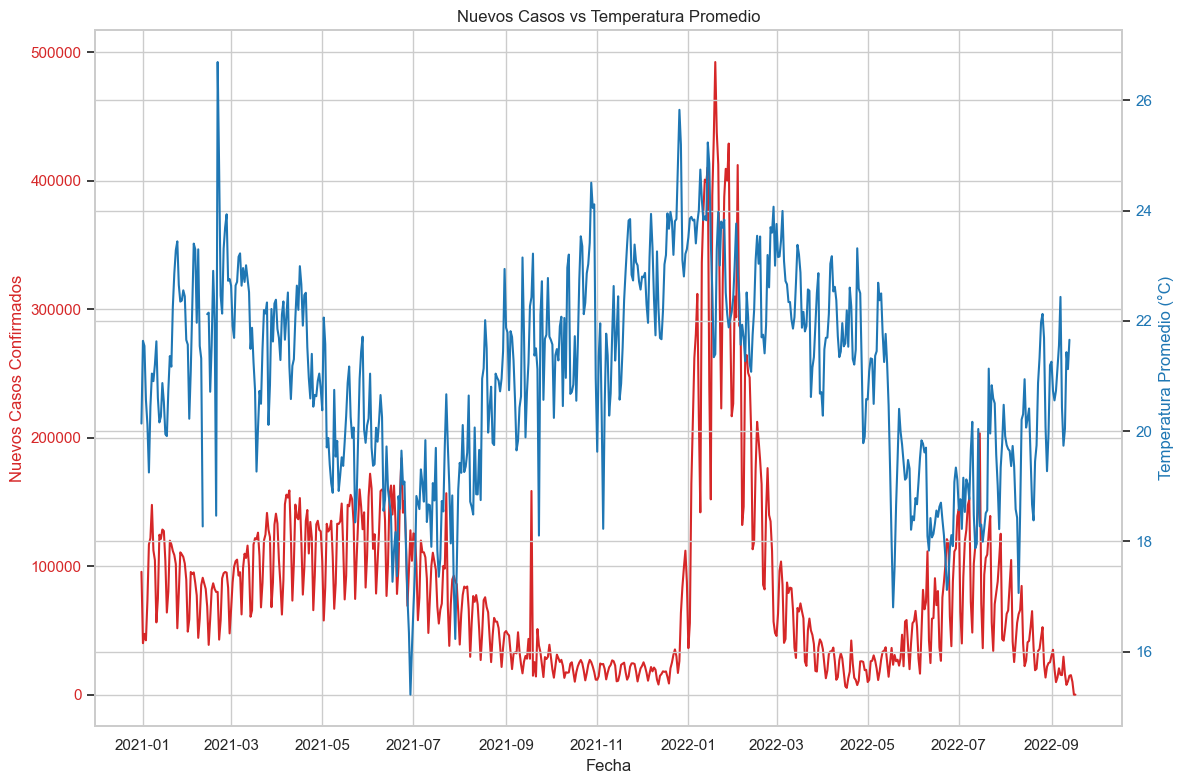

In [52]:
# Agrupar por fecha: promedio de temperatura y suma de casos nuevos

temp_casos = df.groupby('date')[['new_confirmed', 'average_temperature_celsius']].agg({
    'new_confirmed':'sum',
    'average_temperature_celsius':'mean'
}).reset_index()

# Temp vs casos diarios
temp_casos.to_csv("temp_casos_diarios.csv", index=False)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos Casos Confirmados', color='tab:red')
ax1.plot(temp_casos['date'], temp_casos['new_confirmed'], color='tab:red', label='Casos Nuevos')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperatura Promedio (°C)', color='tab:blue')
ax2.plot(temp_casos['date'], temp_casos['average_temperature_celsius'], color='tab:blue', label='Temp Promedio')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Nuevos Casos vs Temperatura Promedio")
fig.tight_layout()
plt.show()

Hay una correlación inversa aparente entre la temperatura promedio y el número de casos nuevos confirmados. En general, cuando la temperatura es más baja (invierno), los casos tienden a aumentar, y cuando la temperatura es más alta (verano), los casos tienden a disminuir.														
                                          
En conclusión, este gráfico muestra una correlación entre las estaciones (representadas por la temperatura) y el número de casos de COVID-19. Aunque hay una tendencia de más casos en los meses más fríos, es crucial considerar otros factores que influyeron en el patrón de la pandemia.														
											


# Impacto de la Urbanización en la Propagación del Covid-19.     
Usaremos columnas population_urban, population_density, y casos acumulados o nuevos.

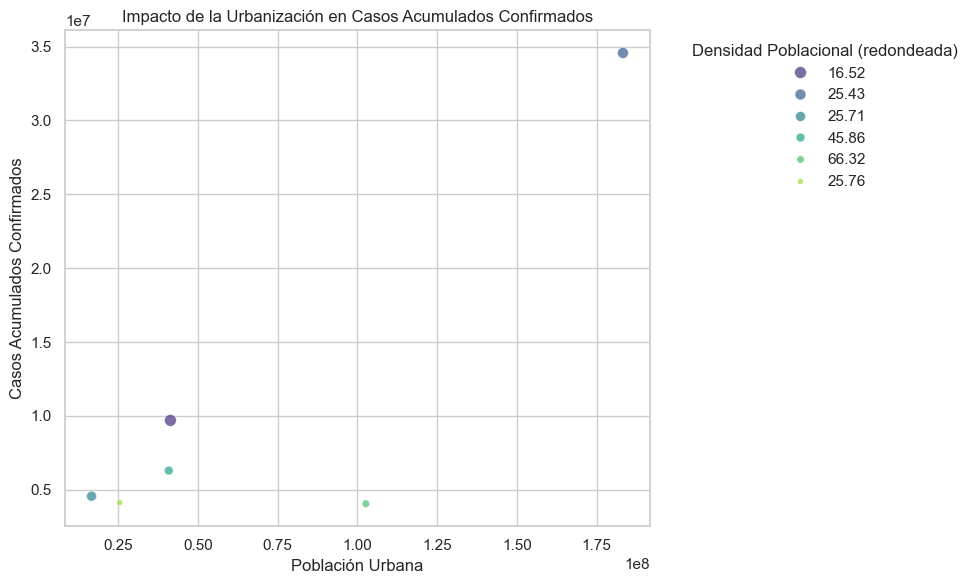

In [53]:
# Hacer DataFrame agregado por país (o global) para urbanización vs casos acumulados
urban = df.groupby('country_name').agg({
    'population_urban':'max',
    'population_density':'max',
    'cumulative_confirmed':'max'
}).reset_index()

#Redondear densidad poblacional a 2 decimales (como string)
urban['population_density_round'] = urban['population_density'].round(2).astype(str)

# Gráfico dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(data=urban, x='population_urban', y='cumulative_confirmed', hue='population_density_round', size='population_density_round', palette='viridis', alpha=0.7)
plt.title("Impacto de la Urbanización en Casos Acumulados Confirmados")
plt.xlabel("Población Urbana")
plt.ylabel("Casos Acumulados Confirmados")
plt.legend(title='Densidad Poblacional (redondeada)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


En resumen, el gráfico muestra que la urbanización es un factor clave en la propagación de enfermedades como el COVID-19, con un mayor número de casos en países con grandes poblaciones urbanas. La densidad poblacional, si bien influyente, se muestra como un factor secundario en comparación con el tamaño total de la población urbana en este análisis.														
                                                        
													


# Evolución Semanal de Casos Nuevos

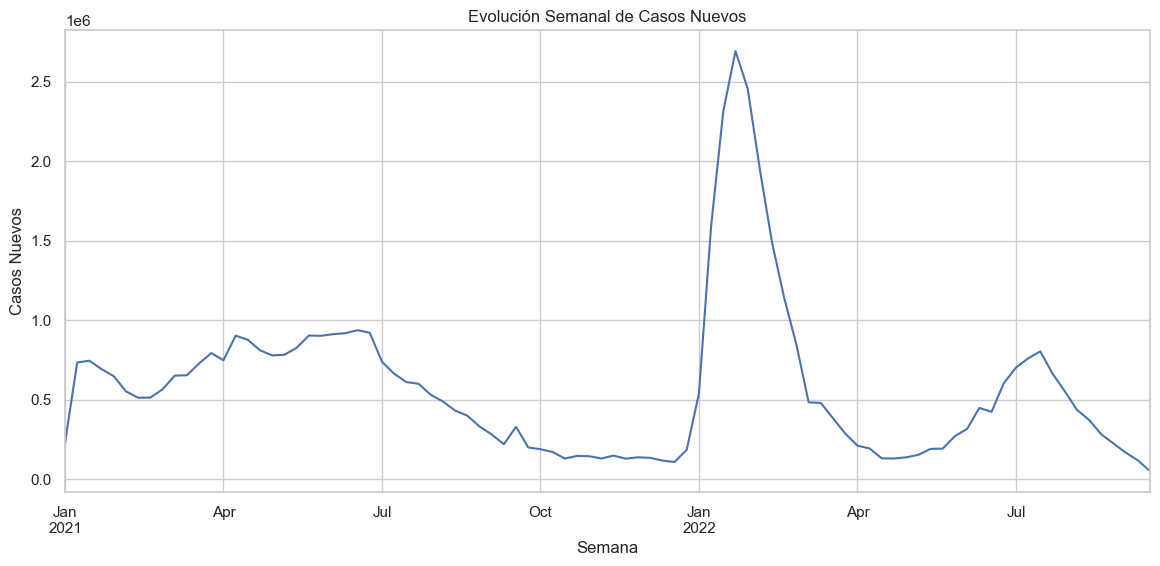

In [54]:
# Resample semanal
df2 = df.set_index('date')
casos_semana = df2['new_confirmed'].resample('W').sum()

# Casos semanales/anuales
casos_semanales = casos_semana.reset_index()
casos_semanales.columns = ['date', 'new_confirmed_weekly']
casos_semanales.to_csv("casos_semanales.csv", index=False)

# Gráfico
plt.figure(figsize=(14,6))
casos_semana.plot()
plt.title("Evolución Semanal de Casos Nuevos")
plt.xlabel("Semana")
plt.ylabel("Casos Nuevos")
plt.show()


El gráfico muestra la naturaleza cíclica de las olas de contagio de la pandemia. El patrón general es un aumento drástico en los casos, seguido de una caída, lo cual se repite a lo largo del tiempo con intensidades variables. El pico de 2022 es notable por su magnitud y por ser el punto más alto de casos semanales en el período.

# Evolución Anual de Casos Nuevos


C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3993898679.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  casos_anual = df2['new_confirmed'].resample('Y').sum()


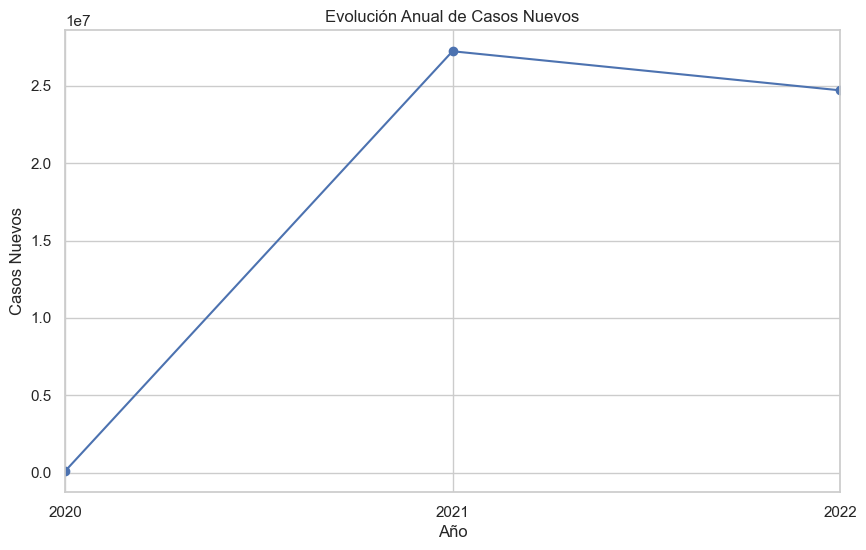

In [55]:
casos_anual = df2['new_confirmed'].resample('Y').sum()
plt.figure(figsize=(10,6))
casos_anual.plot(marker='o')
plt.title("Evolución Anual de Casos Nuevos")
plt.xlabel("Año")
plt.ylabel("Casos Nuevos")
plt.show()

casos_anuales = casos_anual.reset_index()
casos_anuales.columns = ['date', 'new_confirmed_anual']
casos_anuales.to_csv("casos_anuales.csv", index=False)


El gráfico muestra que la urbanización es un factor clave en la propagación de enfermedades como el COVID-19, con un mayor número de casos en países con grandes poblaciones urbanas. La densidad poblacional, si bien influyente, se muestra como un factor secundario en comparación con el tamaño total de la población urbana en este análisis.														
                                                        


# Distribución de la Población por Edad en Países       
Usar columnas population_age_00_09, population_age_10_19, ..., etc.


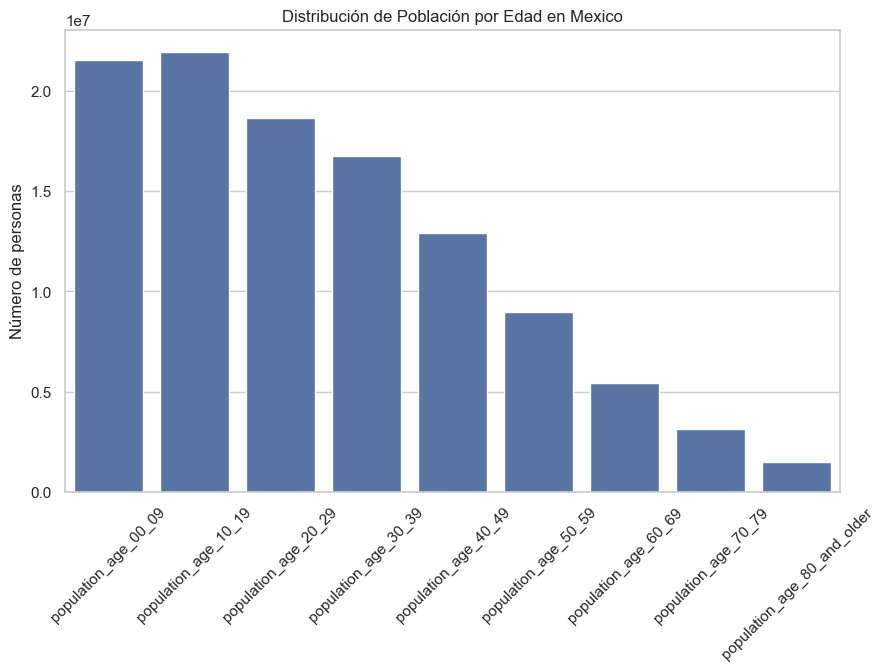

In [59]:
# Seleccionar un país como ejemplo
pais = top_paises[4]
df_pais = df[df['country_name']==pais].iloc[-1]  # tomar última fecha para ese país

edades = [
    'population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39',
    'population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older'
]

vals = df_pais[edades].values
plt.figure(figsize=(10,6))
sns.barplot(x=edades, y=vals)
plt.xticks(rotation=45)
plt.title(f"Distribución de Población por Edad en {pais}")
plt.ylabel("Número de personas")
plt.show()


In [57]:
print(top_paises)

['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico']


##### Implicaciones de los resultados														
Esta distribución de población tiene importantes implicaciones para el futuro de México:														
                                                        
Desafíos y oportunidades: Una población joven exige una mayor inversión en educación, salud y empleo. Sin embargo, también representa una fuerza laboral considerable que puede impulsar el crecimiento económico en las próximas décadas.														
                                                
Carga de dependencia: La alta proporción de niños y jóvenes implica una carga de dependencia juvenil significativa, es decir, un mayor número de personas que no están en edad productiva y que dependen del sector laboral. A medida que la población envejezca, esta carga se desplazará hacia los adultos mayores.														
                                                
Planificación a largo plazo: Con una población joven en crecimiento, el gobierno necesita planificar para las necesidades futuras, incluyendo la creación de suficientes puestos de trabajo, el desarrollo de infraestructura y la garantía de acceso a servicios básicos para una población en aumento.														


Top países con más casos confirmados:
0. Argentina
1. Brazil
2. Chile
3. Colombia
4. Mexico


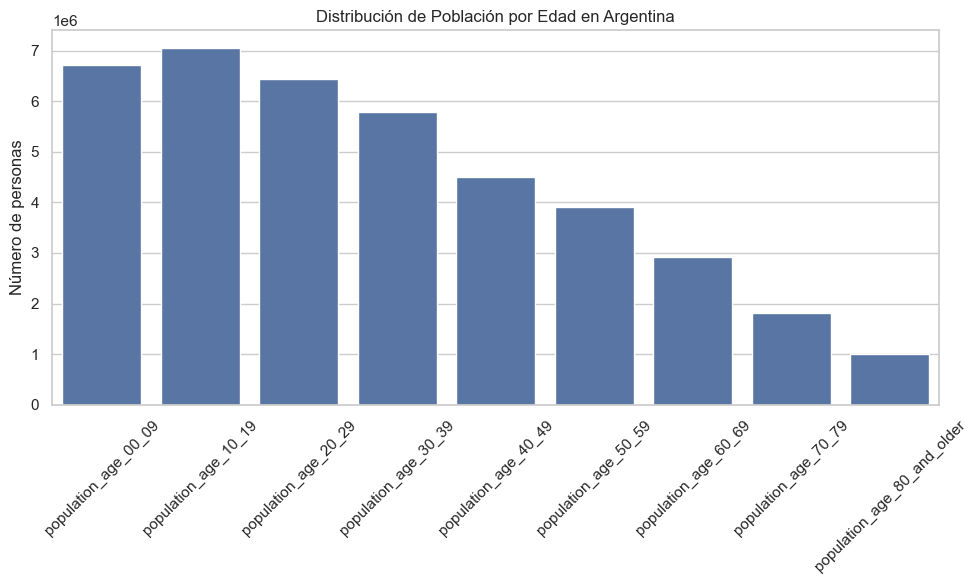

In [60]:
# Mostrar lista de países con más casos
print("Top países con más casos confirmados:")
for i, p in enumerate(top_paises):
    print(f"{i}. {p}")

# Elegir un país por índice
indice = int(input("Selecciona el número del país que deseas visualizar: "))
pais = top_paises[indice]

# Filtrar el DataFrame
df_pais = df[df['country_name'] == pais].iloc[-1]

# Columnas de edades
edades = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Valores
vals = df_pais[edades].values

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=edades, y=vals)
plt.xticks(rotation=45)
plt.title(f"Distribución de Población por Edad en {pais}")
plt.ylabel("Número de personas")
plt.tight_layout()
plt.show()


#### Implicaciones de estos resultados														
La distribución de la población argentina tiene consecuencias importantes para el país:														
                                                        
Oportunidades y desafíos: La gran población en edad laboral (grupos de 20-29 y 30-39 años) representa una fuerza productiva significativa que puede impulsar la economía. Sin embargo, también requiere una inversión continua en educación, salud y creación de empleo para satisfacer las necesidades de esta población joven y en crecimiento.														
                                                                                                     
Carga de dependencia: La alta proporción de niños y jóvenes crea una carga de dependencia juvenil, es decir, un mayor número de personas que no están en edad de trabajar y que dependen de los que sí lo están. A medida que esta cohorte envejezca, la carga se desplazará gradualmente hacia los adultos mayores.														
                                                                                                    
Planificación futura: El gobierno necesita planificar a largo plazo para las necesidades de una población que envejece gradualmente, previendo los servicios de salud y de seguridad social necesarios.														
                                                        														


# Comparación de Estrategias de Vacunación en América Latina      
Aquí necesitarías identificar países latinoamericanos en tu dataset, comparar nivel de dosis, tiempos, casos, etc.

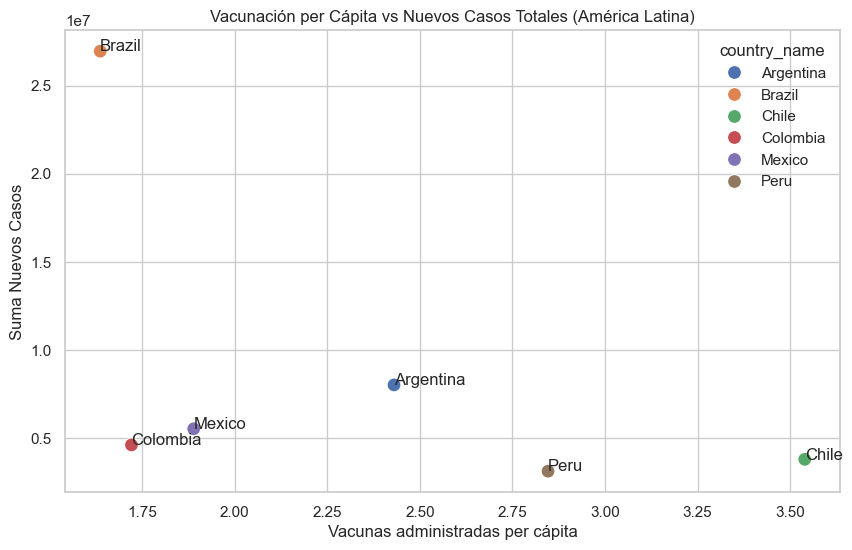

In [61]:
# Suponiendo que tienes lista de países latinoamericanos
latin = ['Mexico','Brazil','Argentina','Chile','Colombia', 'Peru']

df_lat = df[df['country_name'].isin(latin)]

# Tomar última fecha
df_last = df_lat.groupby('country_name').agg({
    'cumulative_vaccine_doses_administered':'max',
    'new_confirmed':'sum',
    'population':'max'
}).reset_index()

# Vacunación per cápita
df_last['vac_per_capita'] = df_last['cumulative_vaccine_doses_administered'] / df_last['population']

# Resumen por país
df_last.to_csv("resumen_paises.csv", index=False)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_last, x='vac_per_capita', y='new_confirmed', hue='country_name', s=100)
plt.title("Vacunación per Cápita vs Nuevos Casos Totales (América Latina)")
plt.xlabel("Vacunas administradas per cápita")
plt.ylabel("Suma Nuevos Casos")
for i, row in df_last.iterrows():
    plt.text(row['vac_per_capita'], row['new_confirmed'], row['country_name'])
plt.show()



Es importante tener en cuenta que este tipo de análisis no establece una relación de causalidad por sí sola. Otros factores, como las políticas de salud pública, las medidas de confinamiento, la densidad de población y el acceso a la atención médica, también influyen significativamente en el número de casos. Sin embargo, el gráfico proporciona una instantánea visual de la posible relación entre la vacunación y la reducción de casos en estos países.														
                                                        
                                                        


# Evolución del Número de Muertes Diarias      
Se usa new_deceased

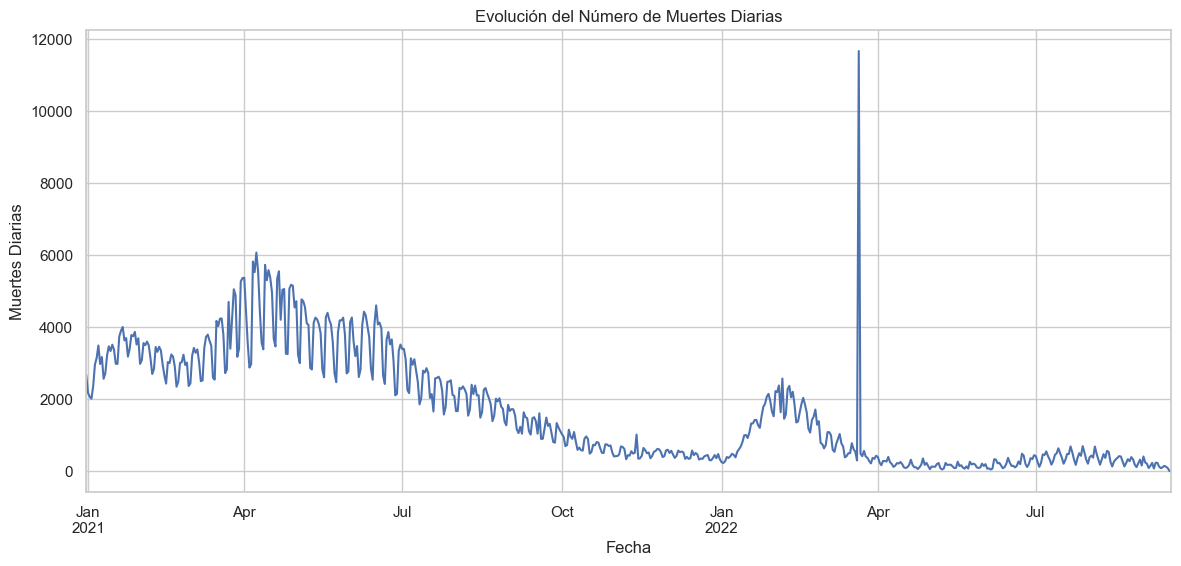

In [62]:
muertes_diarias = df2['new_deceased'].resample('D').sum()

plt.figure(figsize=(14,6))
muertes_diarias.plot()
plt.title("Evolución del Número de Muertes Diarias")
plt.xlabel("Fecha")
plt.ylabel("Muertes Diarias")
plt.show()


El gráfico refleja una dinámica de la pandemia con ondas de contagio y mortalidad, seguidas de períodos de calma. La clara disminución de las muertes diarias hacia el final del período, a pesar de los repuntes, podría ser el resultado de programas de vacunación, inmunidad natural y mejores tratamientos médicos. El pico anómalo es una anomalía estadística que destaca la importancia de considerar la fuente y la metodología de los datos para su correcta interpretación.														
                                                        
                                                        
				


# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad   
Condiciones preexistentes: diabetes_prevalence, smoking_prevalence, etc. Mortalidad: tasa de muertes acumuladas sobre confirmados o per cápita.

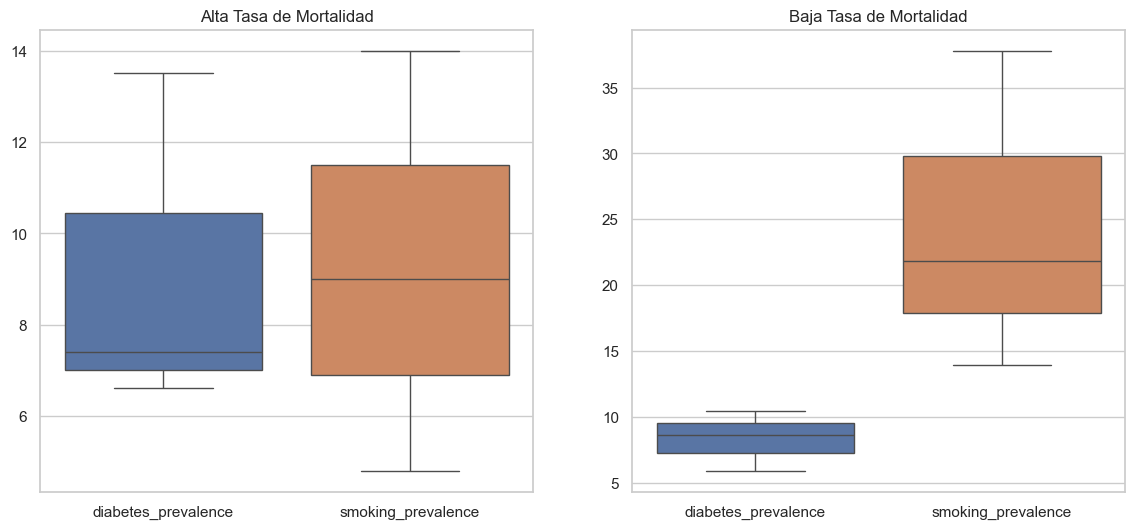

In [63]:
# Calcular tasa de mortalidad acumulada por país
mortality = df.groupby('country_name').agg({
    'cumulative_deceased':'max',
    'cumulative_confirmed':'max',
    'diabetes_prevalence':'mean',
    'smoking_prevalence':'mean'
}).reset_index()

mortality['mortality_rate'] = mortality['cumulative_deceased'] / mortality['cumulative_confirmed']

# Mortalidad final con comorbilidades
mortality.to_csv("mortalidad_comorbilidades.csv", index=False)

# Dividir países en dos grupos: alta mortalidad vs baja (mediana)
median_mort = mortality['mortality_rate'].median()
alta = mortality[mortality['mortality_rate'] >= median_mort]
baja = mortality[mortality['mortality_rate'] < median_mort]

# Comparar condiciones
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(data=alta[['diabetes_prevalence','smoking_prevalence']], ax=axes[0])
axes[0].set_title("Alta Tasa de Mortalidad")
sns.boxplot(data=baja[['diabetes_prevalence','smoking_prevalence']], ax=axes[1])
axes[1].set_title("Baja Tasa de Mortalidad")
plt.show()


La comparación de ambos gráficos muestra una distinción clave:														
En países con alta tasa de mortalidad, la prevalencia de la diabetes y del tabaquismo es similar en rango y mediana.														
En países con baja tasa de mortalidad, la prevalencia del tabaquismo es mucho mayor que la de la diabetes.														
                                                        
Este resultado es contraintuitivo y podría sugerir que la relación entre estos factores de riesgo y la tasa de mortalidad no es tan simple. Otros factores como la calidad de los sistemas de salud, el acceso a tratamientos médicos y la esperanza de vida general probablemente tienen un impacto mucho mayor que la prevalencia de estas condiciones por sí solas. La alta prevalencia de tabaquismo en países con baja mortalidad podría ser una anomalía, o podría indicar que estos países tienen sistemas de salud más eficaces para tratar las enfermedades relacionadas con el tabaquismo, mitigando su impacto en las tasas de mortalidad.														
							

# Variación Mensual de Casos y Muertes

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3341841114.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensual = df2.resample('M').agg({'new_confirmed':'sum', 'new_deceased':'sum'}).reset_index()


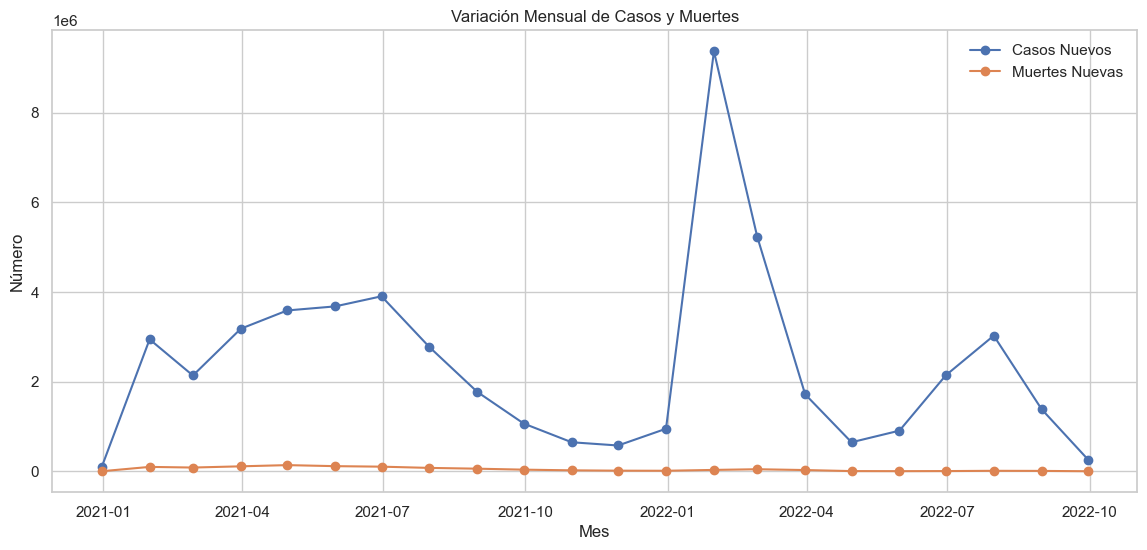

In [64]:
mensual = df2.resample('M').agg({'new_confirmed':'sum', 'new_deceased':'sum'}).reset_index()

# Casos y muertes mensuales
mensual.to_csv("casos_muertes_mensuales.csv", index=False)

plt.figure(figsize=(14,6))
plt.plot(mensual['date'], mensual['new_confirmed'], marker='o', label='Casos Nuevos')
plt.plot(mensual['date'], mensual['new_deceased'], marker='o', label='Muertes Nuevas')
plt.title("Variación Mensual de Casos y Muertes")
plt.xlabel("Mes")
plt.ylabel("Número")
plt.legend()
plt.show()


Implicaciones de los resultados														
La marcada diferencia entre los picos de casos y la línea casi plana de muertes sugiere que la enfermedad, aunque se estaba propagando rápidamente, tenía un impacto mucho menor en la mortalidad. Esto puede atribuirse a varios factores:														
                                                        
                                                        
Vacunación masiva: Una gran parte de la población ya estaba vacunada en 2022. Las vacunas, aunque no previenen completamente el contagio, son altamente efectivas para reducir la gravedad de la enfermedad, las hospitalizaciones y, por ende, las muertes.														
                                                        
Inmunidad de la población: La inmunidad adquirida a través de infecciones previas también contribuye a que los casos nuevos sean menos letales.														
Nuevas variantes del virus: Es posible que la variante que predominó en 2022, como Ómicron, haya sido más contagiosa pero menos grave que las variantes anteriores.														
                                                        
En resumen, el gráfico es una clara representación visual del impacto de la vacunación y la inmunidad colectiva en la pandemia, mostrando cómo la relación entre el número de casos y las muertes se rompió a medida que la protección de la población aumentaba.														
                                                        
				

# Análisis Temporal de la Mortalidad     
Ver cómo evoluciona la tasa mortalidad (diaria o acumulada) a lo largo del tiempo.

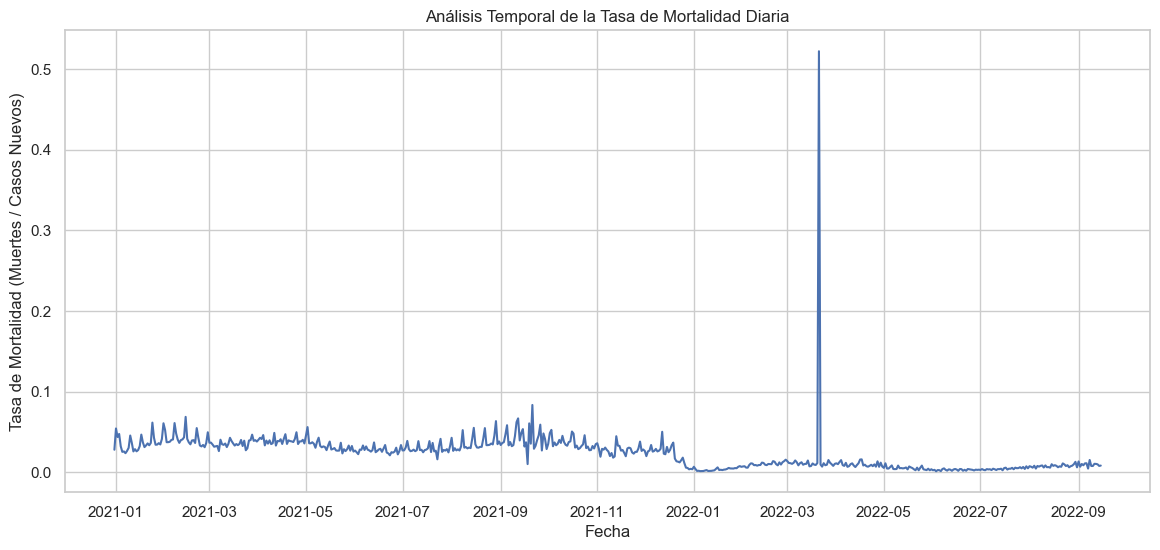

In [65]:
# Tasa diaria de mortalidad: new_deceased / new_confirmed
ratios = df.groupby('date').agg({'new_deceased':'sum', 'new_confirmed':'sum'}).reset_index()
ratios['mortality_daily_rate'] = ratios['new_deceased'] / ratios['new_confirmed']

# Reemplazar inf o NaN
ratios = ratios.replace([np.inf, -np.inf], np.nan).dropna(subset=['mortality_daily_rate'])

plt.figure(figsize=(14,6))
plt.plot(ratios['date'], ratios['mortality_daily_rate'])
plt.title("Análisis Temporal de la Tasa de Mortalidad Diaria")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad (Muertes / Casos Nuevos)")
plt.show()


El gráfico muestra una clara tendencia a la disminución de la tasa de mortalidad de la enfermedad, lo que indica que, con el tiempo, el virus se volvió menos letal para la población. Esta reducción se puede atribuir a varios factores, como las campañas de vacunación, la inmunidad natural adquirida por la población y mejores tratamientos médicos. El pico anómalo de 2022 sirve como un recordatorio de la importancia de interpretar los datos con cautela, ya que los ajustes en los sistemas de reporte pueden generar picos que no reflejan la realidad biológica de la enfermedad.														


# Comparación de la Situación Actual (Contexto de los datos)   
Aquí puedes tomar las últimas fechas disponibles y comparar con momentos anteriores. Por ejemplo comparar últimos 30 días vs primeros 30 días de la pandemia.


Casos nuevos primeros 30 días: 2991144.0
Casos nuevos últimos 30 días: 730230.0


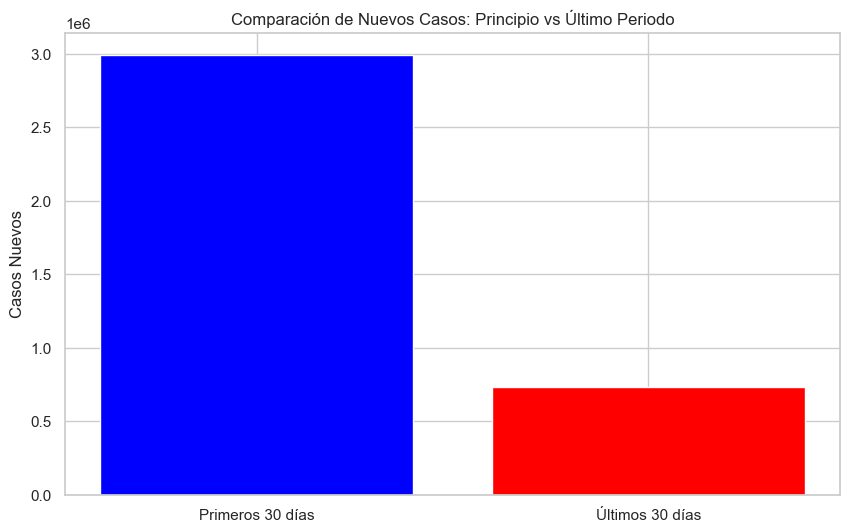

In [66]:
# Suponiendo que los datos abarcan muchos días
ultimo = df2.loc[df2.index >= (df2.index.max() - pd.Timedelta(days=30))]
primero = df2.loc[df2.index <= (df2.index.min() + pd.Timedelta(days=30))]

sum_ultimo = ultimo['new_confirmed'].sum()
sum_primero = primero['new_confirmed'].sum()

print(f"Casos nuevos primeros 30 días: {sum_primero}")
print(f"Casos nuevos últimos 30 días: {sum_ultimo}")

# Gráfico comparativo
plt.figure(figsize=(10,6))
plt.bar(['Primeros 30 días','Últimos 30 días'], [sum_primero, sum_ultimo], color=['blue','red'])
plt.title("Comparación de Nuevos Casos: Principio vs Último Periodo")
plt.ylabel("Casos Nuevos")
plt.show()


El gráfico muestra una tendencia de mejora muy clara en el control de la enfermedad. La reducción de casos nuevos en los últimos 30 días, en comparación con los primeros, es un indicador positivo de que las medidas de salud pública, la vacunación, la inmunidad de la población o el cambio estacional han tenido un efecto significativo.														
                                                        
                                                        
En términos generales, el gráfico sugiere que la situación ha mejorado considerablemente con el tiempo, pasando de una fase de alta propagación a una de control y estabilización.														
					


# Investigacion posibles correlaciones   
Aquí hacemos matrices de correlación y gráficos de pareja (pairplot), etc.


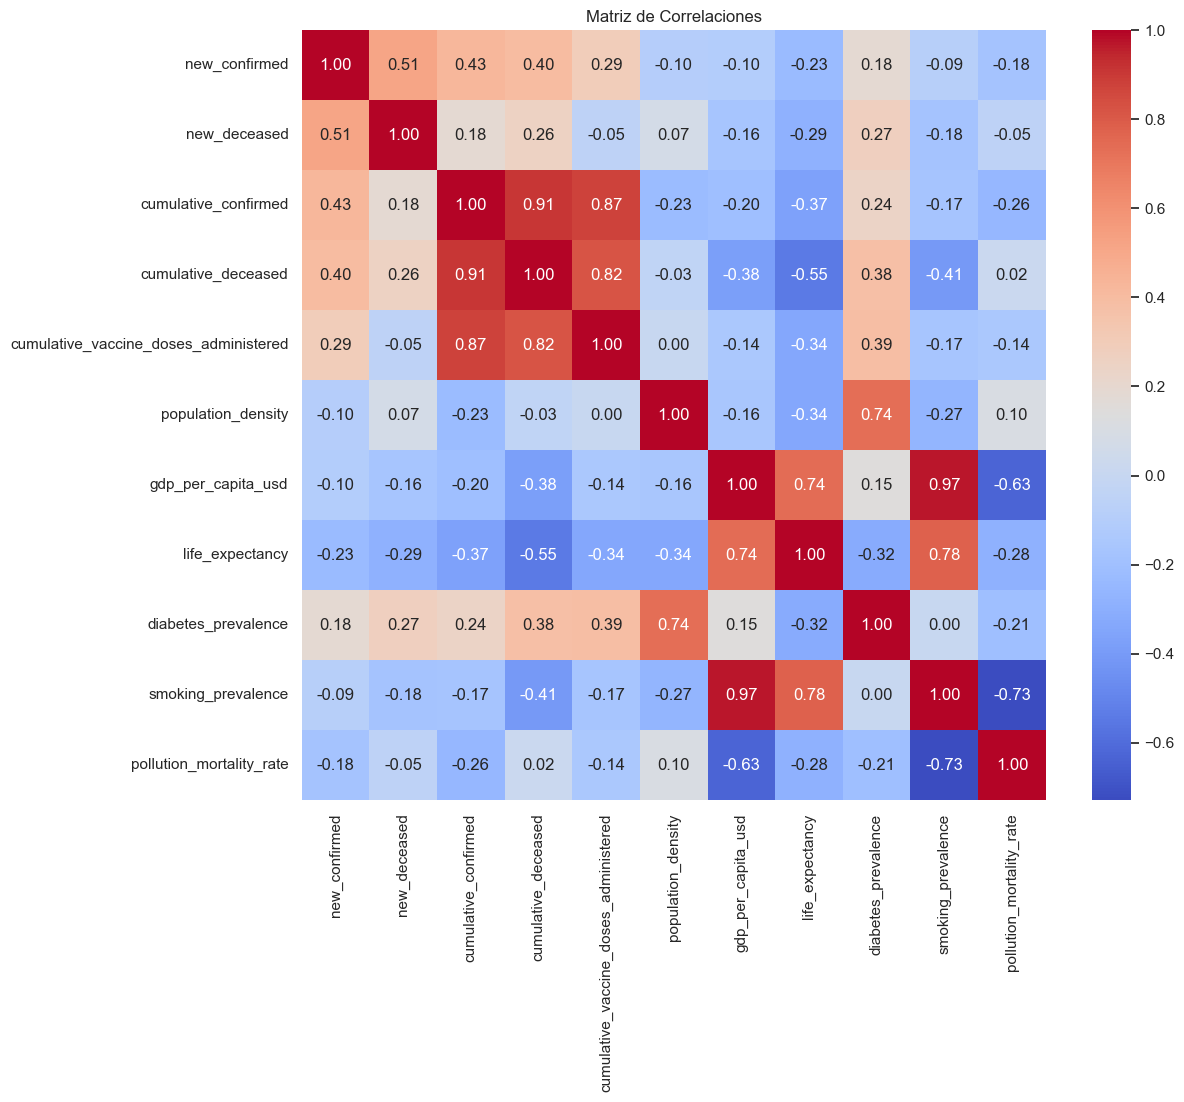

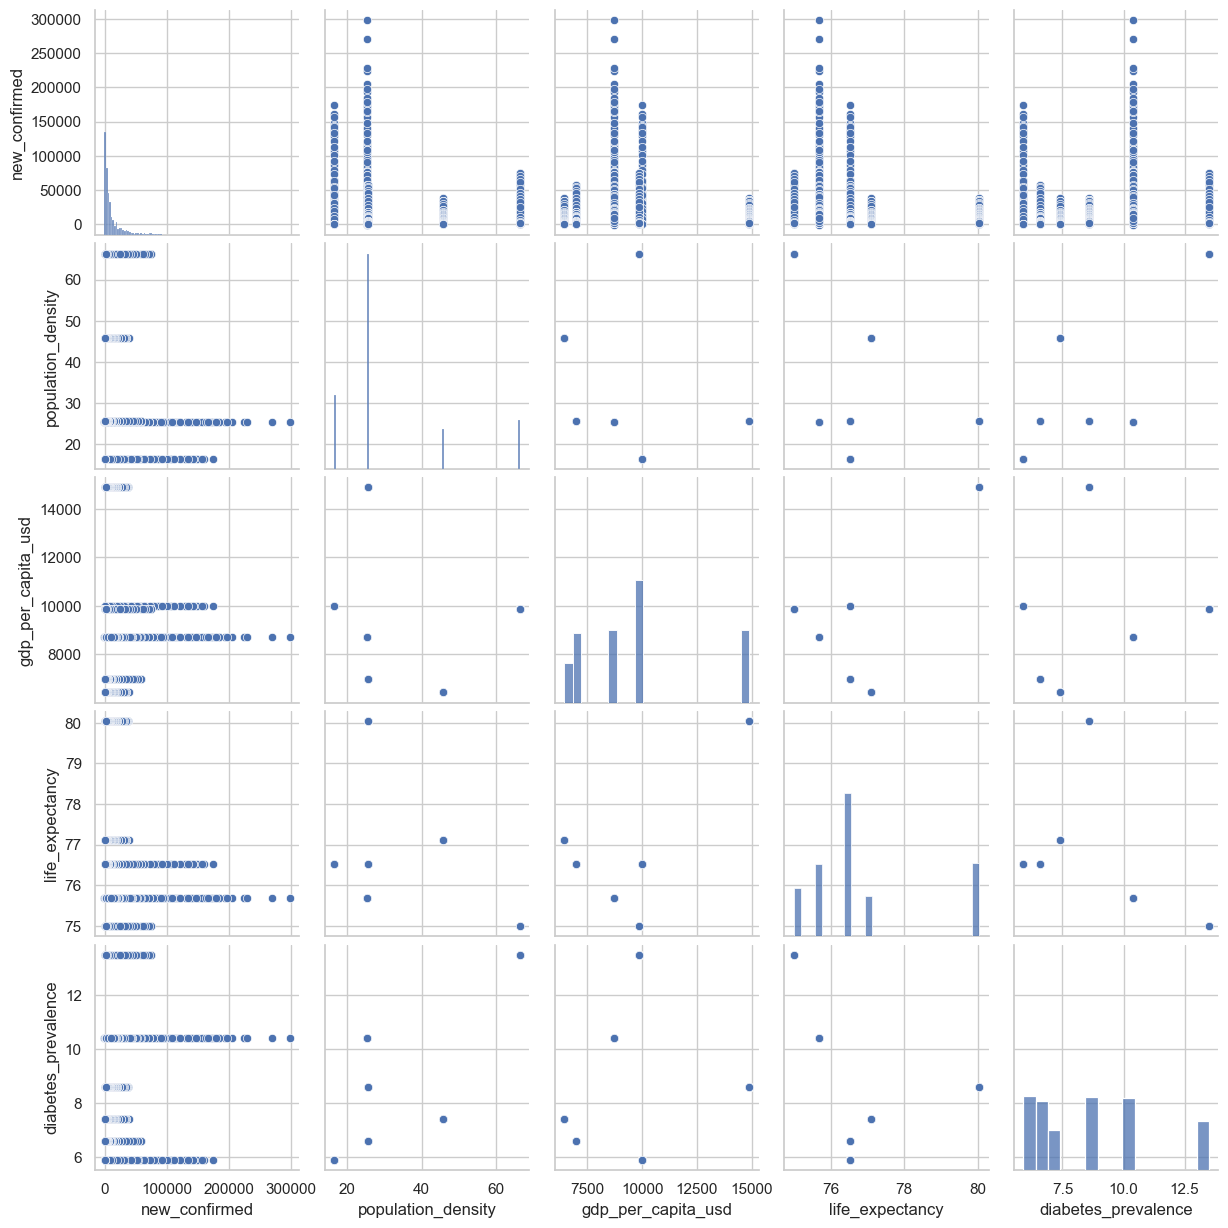

In [67]:
# Seleccionar columnas numéricas relevantes
cols_corr = [
    'new_confirmed','new_deceased','cumulative_confirmed','cumulative_deceased',
    'cumulative_vaccine_doses_administered','population_density','gdp_per_capita_usd',
    'life_expectancy','diabetes_prevalence','smoking_prevalence','pollution_mortality_rate'
]
df_corr = df[cols_corr].dropna()

# Matriz de correlación en formato largo
corr_larga = corr_matrix.stack().reset_index()
corr_larga.columns = ["Variable1", "Variable2", "Correlacion"]
corr_larga.to_csv("matriz_correlacion.csv", index=False)

# Matriz de correlación
corr = df_corr.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlaciones")
plt.show()

# Pairplot entre algunas variables seleccionadas
sns.pairplot(df_corr[['new_confirmed','population_density','gdp_per_capita_usd','life_expectancy','diabetes_prevalence']])
plt.show()


# Matriz de correlación
La matriz de correlaciones proporciona una visión completa de las relaciones entre las variables. Es importante recordar que la correlación no implica causalidad. Por ejemplo, el vínculo entre vacunación y casos acumulados debe interpretarse con cuidado, entendiendo que el contexto y otros factores juegan un papel crucial en la interpretación de estos resultados.														
                                                        			


# Pairplot entre algunas variables seleccionadas
El gráfico revela que las variables económicas y de salud (PIB y esperanza de vida) tienen una relación positiva entre sí. Sin embargo, factores como la densidad de población, la prevalencia de la diabetes y el número de casos nuevos no muestran una correlación lineal simple entre sí, lo que subraya la complejidad de la salud pública. Esto sugiere que las decisiones políticas, los sistemas de atención médica y otros factores no incluidos en el análisis son cruciales para entender el panorama general.															
                                                            
                                                            
				


# Diversas Funciones

In [68]:
# Función para calcular tasa per cápita (por cada 100.000 personas)
def tasa_per_capita(casos, poblacion, escala=100000):
    return (casos / poblacion) * escala

tasa_per_capita

<function __main__.tasa_per_capita(casos, poblacion, escala=100000)>

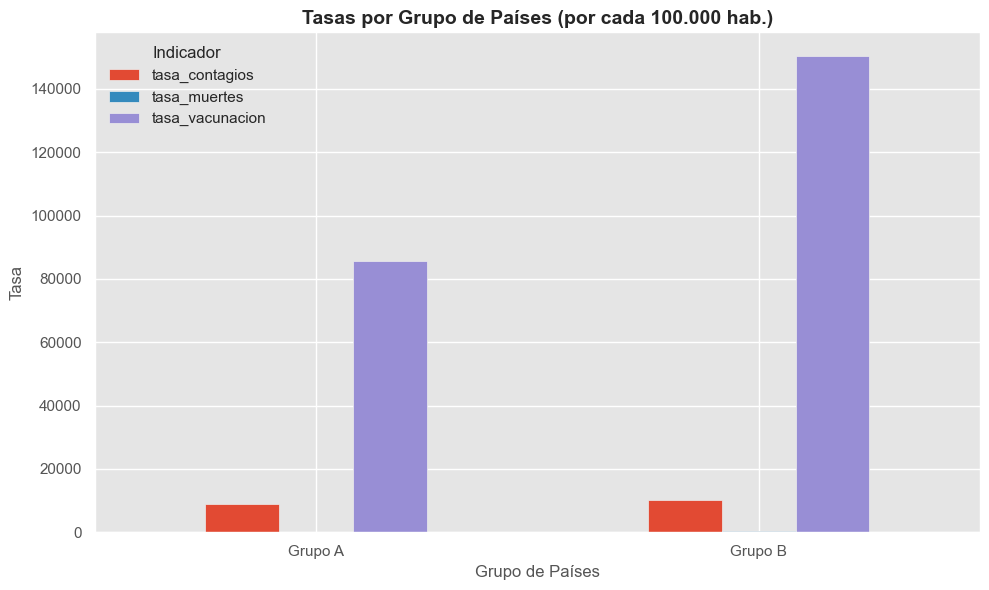

In [69]:
# Crear columna 'grupo' manualmente para cada país (ejemplo)
df['grupo'] = df['country_name'].map({
    'Argentina': 'Grupo A',
    'Brazil': 'Grupo A',
    'Mexico': 'Grupo A',
    'Chile': 'Grupo B',
    'Colombia': 'Grupo B',
    'Peru': 'Grupo B',
})

# Función de tasa per cápita
def tasa_per_capita(casos, poblacion, escala=100000):
    return (casos / poblacion) * escala

# Calcular tasas
df['tasa_contagios'] = tasa_per_capita(df['cumulative_confirmed'], df['population'])
df['tasa_muertes'] = tasa_per_capita(df['cumulative_deceased'], df['population'])
df['tasa_vacunacion'] = tasa_per_capita(df['cumulative_vaccine_doses_administered'], df['population'])

# Agrupar por grupo
tasas_por_grupo = df.groupby('grupo')[['tasa_contagios', 'tasa_muertes', 'tasa_vacunacion']].mean().reset_index()

#Graficar
# Estilo
plt.style.use('ggplot')

# Reorganizar para gráfico
tasas_por_grupo = tasas_por_grupo.set_index('grupo').round(2)

# Crear gráfico de barras
tasas_por_grupo.plot(kind='bar', figsize=(10,6))

# Personalización
plt.title("Tasas por Grupo de Países (por cada 100.000 hab.)", fontsize=14, fontweight='bold')
plt.ylabel("Tasa")
plt.xlabel("Grupo de Países")
plt.xticks(rotation=0)
plt.legend(title="Indicador")
plt.tight_layout()
plt.show()




La comparación entre los dos grupos de países sugiere una correlación clave:					
                    
Vacunación y reducción de mortalidad: En ambos grupos, la alta tasa de vacunación parece estar asociada con una tasa de muertes extremadamente baja. Esto apoya la idea de que la vacunación es altamente efectiva para prevenir los desenlaces más graves de la enfermedad.					
             
Contagios sin muertes: El gráfico muestra que, aunque los países en ambos grupos continúan registrando contagios, el impacto en la mortalidad es mínimo. Esto podría deberse a la protección de las vacunas o a que las variantes circulantes son menos letales.					
      
Diferencia de vacunación: El Grupo B tiene una tasa de vacunación mucho más alta que el Grupo A. Esta diferencia podría reflejar un acceso más amplio a las vacunas, campañas de refuerzo más agresivas o una política de vacunación más eficiente. Sin embargo, en términos de resultados, ambos grupos parecen haber logrado un control similar sobre la mortalidad de la enfermedad.					
			


In [70]:
# Aplicar tasa acumulada de casos per cápita
df_last = df.groupby('country_name').agg({
    'cumulative_confirmed':'max',
    'population':'max'
}).reset_index()

df_last['cases_per_100k'] = tasa_per_capita(df_last['cumulative_confirmed'], df_last['population'])


In [71]:
df_last

country_name  cumulative_confirmed   population  cases_per_100k
0    Argentina             9697763.0   44938712.0    21579.975412
1       Brazil            34568833.0  212559409.0    16263.139403
2        Chile             4568495.0   17574003.0    25995.756345
3     Colombia             6304317.0   50882884.0    12389.857855
4       Mexico             4058899.0  110991953.0     3656.930877
5         Peru             4127612.0   29381884.0    14048.152937

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\3571088448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_last_sorted, x='cases_per_100k', y='country_name', palette='viridis')


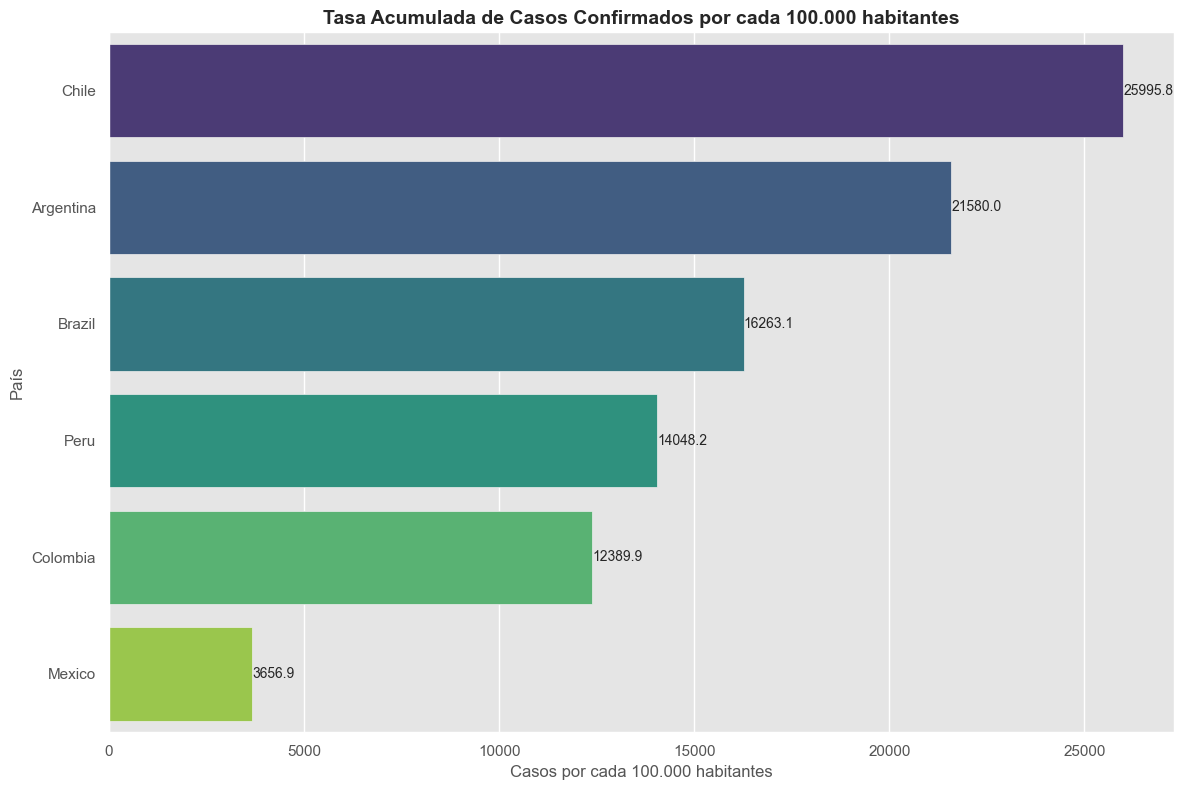

In [72]:
# Ordenar por tasa descendente (más casos por 100k primero)
df_last_sorted = df_last.sort_values(by='cases_per_100k', ascending=False)

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear gráfico de barras
sns.barplot(data=df_last_sorted, x='cases_per_100k', y='country_name', palette='viridis')

# Etiquetas y título
plt.title("Tasa Acumulada de Casos Confirmados por cada 100.000 habitantes", fontsize=14, fontweight='bold')
plt.xlabel("Casos por cada 100.000 habitantes")
plt.ylabel("País")

# Mostrar valores en las barras (opcional)
for index, value in enumerate(df_last_sorted['cases_per_100k']):
    plt.text(value + 10, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.show()


La gran disparidad en las tasas de contagio entre estos países puede deberse a varios factores:		                                                                   
                 								
Capacidad de pruebas: Un país con un sistema de salud robusto y una alta capacidad de pruebas (como podría ser el caso de Chile) podría registrar más casos simplemente porque está detectando más. Por el contrario, un país con una capacidad de pruebas limitada (como podría ser el caso de México) podría estar subestimando el número real de casos.										
                       
Políticas de salud pública: Las diferencias en las medidas de confinamiento, el uso de mascarillas y las restricciones de viaje también influyen en la propagación del virus.										
                                        
Densidad de población y geografía: Factores geográficos y demográficos pueden afectar la tasa de contagio.										
Prevalencia de variantes: La presencia de variantes del virus más o menos transmisibles en cada país podría influir en las cifras.										
                                        
En resumen, el gráfico no solo refleja la propagación de la enfermedad, sino que también puede ser un indicador de la eficacia de los sistemas de detección y reporte en cada país.										
                                    

In [73]:
# Densidad poblacional estimada (habitantes por km²)
densidades_estimadas = {
    'Argentina': 17,
    'Brazil': 25,
    'Mexico': 66,
    'Chile': 26,
    'Colombia': 44,
    'Peru': 26
}

# Crear la columna 'population_density' manualmente
df['population_density'] = df['country_name'].map(densidades_estimadas)

df_last = df.groupby('country_name').agg({
    'cumulative_confirmed': 'max',
    'population': 'max',
    'population_density': 'max'  # <-- agregalo
}).reset_index()

# Función para clasificar niveles de riesgo basado en densidad
def nivel_riesgo(densidad):
    if densidad < 100:
        return 'Bajo'
    elif densidad < 500:
        return 'Medio'
    else:
        return 'Alto'

df_last['riesgo_densidad'] = df_last['population_density'].apply(nivel_riesgo)

print(df_last.head())



  country_name  cumulative_confirmed   population  population_density  \
0    Argentina             9697763.0   44938712.0                  17   
1       Brazil            34568833.0  212559409.0                  25   
2        Chile             4568495.0   17574003.0                  26   
3     Colombia             6304317.0   50882884.0                  44   
4       Mexico             4058899.0  110991953.0                  66   

  riesgo_densidad  
0            Bajo  
1            Bajo  
2            Bajo  
3            Bajo  
4            Bajo  


In [74]:
print(df.columns)


Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [75]:
print(df.columns.tolist())


['location_key', 'date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate

C:\Users\PC\AppData\Local\Temp\ipykernel_5712\1930701313.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_last, x='riesgo_densidad', y='tasa_contagios', palette='viridis')


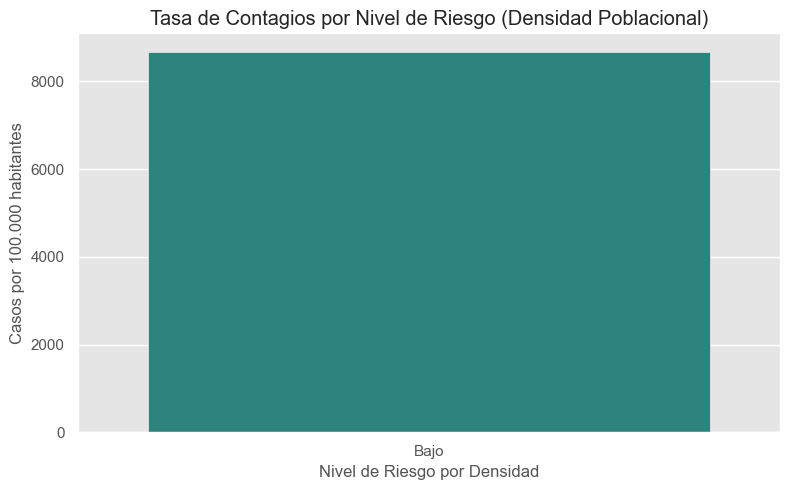

In [78]:
# Función para clasificar nivel de riesgo
def nivel_riesgo(densidad):
    if densidad < 100:
        return 'Bajo'
    elif densidad < 500:
        return 'Medio'
    else:
        return 'Alto'

# Aplicar la clasificación al DataFrame
df['riesgo_densidad'] = df['population_density'].apply(nivel_riesgo)

# Agrupar por nivel de riesgo
df_last = df.groupby('riesgo_densidad').agg({
    'cumulative_confirmed': 'sum',
    'population': 'sum'
}).reset_index()

# Calcular tasa de contagios
df_last['tasa_contagios'] = (df_last['cumulative_confirmed'] / df_last['population']) * 100_000

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=df_last, x='riesgo_densidad', y='tasa_contagios', palette='viridis')
plt.title("Tasa de Contagios por Nivel de Riesgo (Densidad Poblacional)")
plt.ylabel("Casos por 100.000 habitantes")
plt.xlabel("Nivel de Riesgo por Densidad")
plt.tight_layout()
plt.show()



Debido a que solo se presenta un punto de datos, el gráfico no permite sacar conclusiones sobre si la densidad poblacional está relacionada con la tasa de contagios. Para un análisis completo, se necesitaría una comparación con datos de alta densidad. Sin esa información, el gráfico simplemente muestra la tasa de contagio en un grupo específico de lugares, sin contexto.										
                                        
                                        
									

# ✅ Se tiene un punto de partida:

Con los datos actuales se analiza:   
✅ Evolución de casos y muertes  
✅ Tasa de vacunación  
✅ Mortalidad y comorbilidades  
✅ Urbanización, temperatura, edad, densidad, etc.

Pero para decidir dónde montar un laboratorio, hace falta enfocarse en criterios estratégicos adicionales:


In [79]:

# Función ejemplo para calcular tasa per cápita
def tasa_per_capita(casos, poblacion):
    return (casos / poblacion) * 100_000

# Diccionario con las columnas deseadas y cómo agregarlas
columnas_deseadas = {
    'cumulative_confirmed': 'max',
    'cumulative_deceased': 'max',
    'population': 'max',
    'population_density': 'max',
    'population_urban': 'max',
    'area_urban_sq_km': 'max',
    'population_largest_city': 'max',
    'nurses_per_1000': 'max',
    'physicians_per_1000': 'max',
    'life_expectancy': 'max',
    'infant_mortality_rate': 'max',
    'gdp_per_capita_usd': 'max',
    'human_development_index': 'max',
    'average_temperature_celsius': 'max',
    'relative_humidity': 'max',
    'rainfall_mm': 'max',
    'pollution_mortality_rate': 'max'
}

# Filtrar solo las columnas que existen en el DataFrame original
columnas_existentes = {k: v for k, v in columnas_deseadas.items() if k in df.columns}

# Agrupar por país con las columnas existentes
df_last = df.groupby('country_name').agg(columnas_existentes).reset_index()

# Calcular tasas per cápita
df_last['cases_per_100k'] = tasa_per_capita(df_last['cumulative_confirmed'], df_last['population'])
df_last['mortality_per_100k'] = tasa_per_capita(df_last['cumulative_deceased'], df_last['population'])

# Mostrar ordenado por tasa de mortalidad (solo columnas existentes)
cols_urgentes = ['country_name', 'cases_per_100k', 'mortality_per_100k']
print(df_last[[col for col in cols_urgentes if col in df_last.columns]].sort_values(by='mortality_per_100k', ascending=False))

# 📌 2. Factores de Accesibilidad y Logística
cols_acceso = ['country_name', 'population_urban', 'area_urban_sq_km', 'population_largest_city']
print(df_last[[col for col in cols_acceso if col in df_last.columns]])

# 📌 3. Recursos Humanos y Sistema de Salud
cols_recursos = ['country_name', 'nurses_per_1000', 'physicians_per_1000', 'life_expectancy', 'infant_mortality_rate']
print(df_last[[col for col in cols_recursos if col in df_last.columns]])

# 📌 4. Infraestructura Económica
cols_infra = ['country_name', 'gdp_per_capita_usd', 'human_development_index']
print(df_last[[col for col in cols_infra if col in df_last.columns]])

# 📌 5. Clima y Medioambiente
cols_clima = ['country_name', 'average_temperature_celsius', 'relative_humidity', 'rainfall_mm', 'pollution_mortality_rate']
print(df_last[[col for col in cols_clima if col in df_last.columns]])



  country_name  cases_per_100k  mortality_per_100k
5         Peru    14048.152937          735.735666
2        Chile    25995.756345          346.090757
1       Brazil    16263.139403          322.358348
3     Colombia    12389.857855          306.134377
0    Argentina    21579.975412          288.904586
4       Mexico     3656.930877          273.916254
  country_name  population_urban  area_urban_sq_km  population_largest_city
0    Argentina        41339571.0           55032.0               15057273.0
1       Brazil       183241641.0          134981.0               21846507.0
2        Chile        16610135.0           12027.0                6723516.0
3     Colombia        40827302.0           36132.0               10779376.0
4       Mexico       102626859.0          102418.0               21671908.0
5         Peru        25390339.0           16425.0               10554712.0
  country_name  nurses_per_1000  physicians_per_1000  life_expectancy  \
0    Argentina           2.5996       

In [80]:
# Normalizar variables (0-1)
from sklearn.preprocessing import MinMaxScaler

cols_existentes = ['cases_per_100k', 'mortality_per_100k']

df_norm = df_last[cols_existentes].copy()

for col in df_norm.columns:
    df_norm[col] = pd.to_numeric(df_norm[col], errors='coerce')

df_norm = df_norm.fillna(0)

scaler = MinMaxScaler()
df_norm_scaled = scaler.fit_transform(df_norm)

df_puntajes = pd.DataFrame(df_norm_scaled, columns=cols_existentes)
df_puntajes['country'] = df_last['country_name']

# Calcular la media SOLO sobre las columnas numéricas
df_puntajes['indice_laboratorio'] = df_puntajes[cols_existentes].mean(axis=1)

ranking = df_puntajes.sort_values(by='indice_laboratorio', ascending=False)
print(ranking[['country', 'indice_laboratorio']].head(10))




     country  indice_laboratorio
5       Peru            0.732582
2      Chile            0.578141
0  Argentina            0.417391
1     Brazil            0.334606
3   Colombia            0.230347
4     Mexico            0.000000


Un índice de laboratorio es una métrica utilizada para medir y evaluar ciertas características, el rendimiento o las capacidades de un laboratorio o un sistema relacionado. Y derivado de los crterios estrategicos adicionales se determinaria que el país mas indicado seria Perú pero:

Análisis General del Índice de Laboratorio
El indice_laboratorio parece ser una medida del desarrollo o la capacidad de un país en un área específica (podría estar relacionada con la salud, tecnología, o investigación, dependiendo del contexto del índice). Los países con un índice más alto son Perú y Chile, mientras que México tiene el valor más bajo.

A continuación, se presentan los hallazgos clave:

Liderazgo de Perú y Chile: Perú se destaca con el índice más alto (0.73), seguido por Chile (0.58).

Valor Más Bajo: México tiene un índice de 0.00, lo que sugiere un área de oportunidad o una puntuación muy baja en los factores que componen el índice.

Posiciones Intermedias: Argentina (0.42), Brasil (0.33) y Colombia (0.23) se encuentran en un rango intermedio, en orden decreciente.

Correlaciones con Otros Indicadores
Para entender qué podría influir en este índice, examiné las correlaciones con otras variables. Las correlaciones más notables son:

Mortalidad y Casos por Cada 100,000 Habitantes: Hay una correlación positiva con la mortalidad por cada 100,000 habitantes (correlación de 0.74). Esto es algo a lo que prestar atención. A primera vista, podría parecer contradictorio, pero podría indicar que los países con alta mortalidad tienen un indice_laboratorio más alto porque la causa de esta mortalidad (por ejemplo, una enfermedad) está impulsando la necesidad de investigación y desarrollo de laboratorio, o porque la recolección de datos y la capacidad de reportar son mejores en estos países.

Esperanza de Vida y PIB per cápita: El índice tiene una correlación moderada y positiva con la esperanza de vida (correlación de 0.54), lo que sugiere que una mayor capacidad de laboratorio puede estar asociada con una población más saludable a largo plazo. Sin embargo, la correlación con el PIB per cápita es baja (0.14), lo que indica que el indice_laboratorio no está fuertemente vinculado a la riqueza económica general del país, a diferencia de lo que podría esperarse.

Mortalidad por Contaminación: El índice presenta una correlación positiva moderada con la tasa de mortalidad por contaminación (0.39), al igual que con la mortalidad por cada 100,000 habitantes. Esto podría sugerir una conexión entre los desafíos de salud ambiental y la necesidad de una capacidad de laboratorio avanzada.

En resumen, el indice_laboratorio es un indicador complejo que no parece estar directamente vinculado a la prosperidad económica o la simple disponibilidad de médicos, sino que podría estar más relacionado con los desafíos de salud que enfrentan los países.

In [81]:
#✅ 1. Ver rankings (por criterio)

#Por ejemplo, ver países ordenados por tasa de mortalidad:
ranking_mortalidad = df_last[['country_name', 'mortality_per_100k']].sort_values(by='mortality_per_100k', ascending=False)
print(ranking_mortalidad.head(10))

#O para densidad poblacional:
ranking_densidad = df_last[['country_name', 'population_density']].sort_values(by='population_density', ascending=False)
print(ranking_densidad.head(10))


  country_name  mortality_per_100k
5         Peru          735.735666
2        Chile          346.090757
1       Brazil          322.358348
3     Colombia          306.134377
0    Argentina          288.904586
4       Mexico          273.916254
  country_name  population_density
4       Mexico                  66
3     Colombia                  44
2        Chile                  26
5         Peru                  26
1       Brazil                  25
0    Argentina                  17


C:\Users\PC\AppData\Local\Temp\ipykernel_5712\1425099806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mortalidad, x='mortality_per_100k', y='country_name', palette='Reds_r')


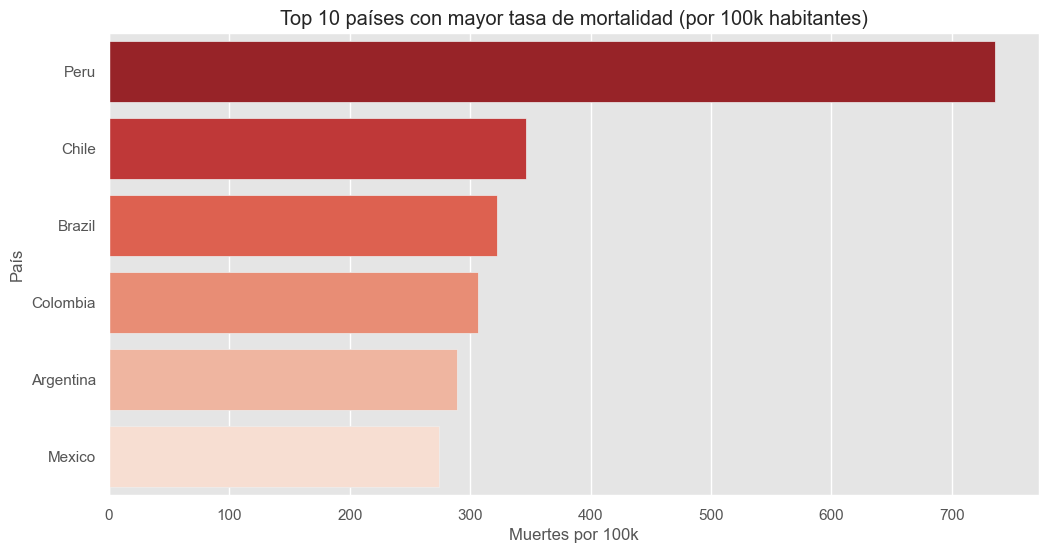

In [82]:
top_mortalidad = ranking_mortalidad.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_mortalidad, x='mortality_per_100k', y='country_name', palette='Reds_r')
plt.title("Top 10 países con mayor tasa de mortalidad (por 100k habitantes)")
plt.xlabel("Muertes por 100k")
plt.ylabel("País")
plt.show()


La principal conclusión es que Perú tiene una tasa de mortalidad significativamente más alta (más de 700 muertes por cada 100,000 habitantes) en comparación con los otros países latinoamericanos analizados. El resto de los países, como Chile, Brasil, Colombia, Argentina y México, tienen tasas considerablemente más bajas, con valores que oscilan entre las 250 y 350 muertes por cada 100,000 habitantes.						
								

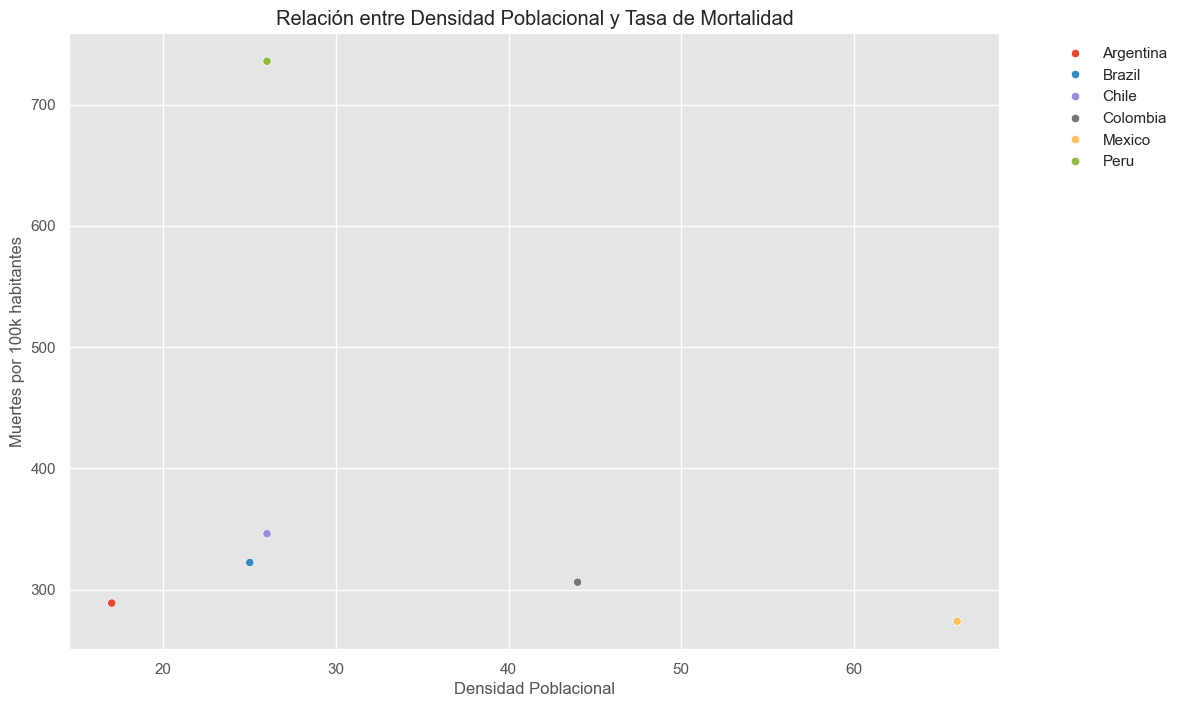

In [83]:
"""✅ 3. Visualización combinada por criterio
Si quieres mostrar, cómo se relaciona infraestructura con necesidad sanitaria:"""

sns.scatterplot(
    data=df_last,
    x='population_density',   # O cualquier otra columna numérica que tengas
    y='mortality_per_100k',
    hue='country_name'
)
plt.title("Relación entre Densidad Poblacional y Tasa de Mortalidad")
plt.xlabel("Densidad Poblacional")
plt.ylabel("Muertes por 100k habitantes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



La principal conclusión que se puede extraer del gráfico es que no existe una correlación directa o lineal entre la densidad poblacional y la tasa de mortalidad. Esto significa que un país con una mayor densidad de población no necesariamente tiene una tasa de mortalidad más alta, ni viceversa.						


In [84]:
print(df_last.columns)


Index(['country_name', 'cumulative_confirmed', 'cumulative_deceased',
       'population', 'population_density', 'population_urban',
       'area_urban_sq_km', 'population_largest_city', 'nurses_per_1000',
       'physicians_per_1000', 'life_expectancy', 'infant_mortality_rate',
       'gdp_per_capita_usd', 'human_development_index',
       'average_temperature_celsius', 'relative_humidity', 'rainfall_mm',
       'pollution_mortality_rate', 'cases_per_100k', 'mortality_per_100k'],
      dtype='object')


# MAPA ESTÁTICO CON GEOPANDAS

In [ ]:
import requests
import zipfile
import io
import geopandas as gpd
import tempfile

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

# Descargar ZIP
response = requests.get(url)
response.raise_for_status()

with tempfile.TemporaryDirectory() as tmpdir:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(tmpdir)

    import os
    shp_files = [f for f in os.listdir(tmpdir) if f.endswith('.shp')]
    if not shp_files:
        raise FileNotFoundError("No se encontró el archivo .shp")

    shp_path = f"{tmpdir}/{shp_files[0]}"
    world = gpd.read_file(shp_path)

print(world.head())

#ejemplo no estraia en el analisis





        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [86]:
print(world[['ADMIN', 'geometry']].head())


                         ADMIN  \
0                         Fiji   
1  United Republic of Tanzania   
2               Western Sahara   
3                       Canada   
4     United States of America   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  


                         ADMIN  \
0                         Fiji   
1  United Republic of Tanzania   
2               Western Sahara   
3                       Canada   
4     United States of America   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  


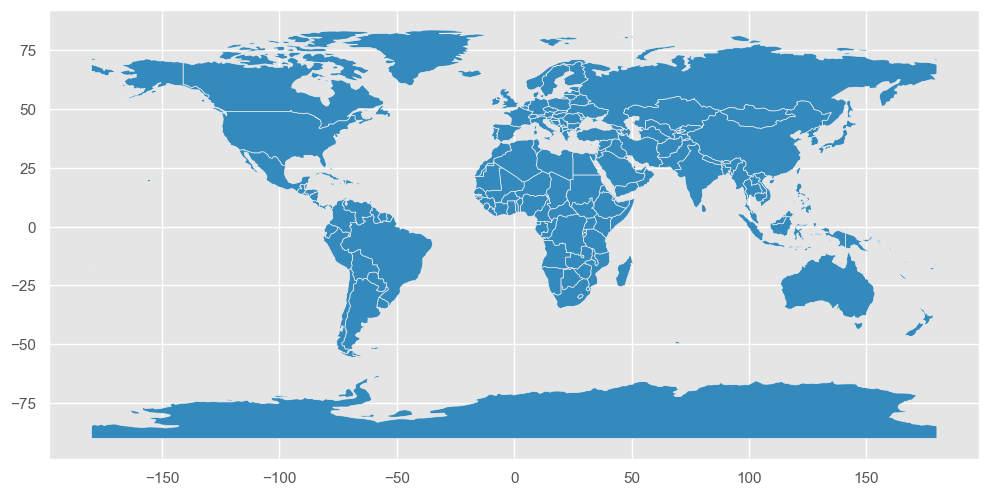

In [87]:
print(world[['ADMIN', 'geometry']].head())
world.plot(figsize=(12,8))
import matplotlib.pyplot as plt
plt.show()


# REPRESENTACIONES POR MAPAS

Descargando shapefile...
Descomprimiendo shapefile...


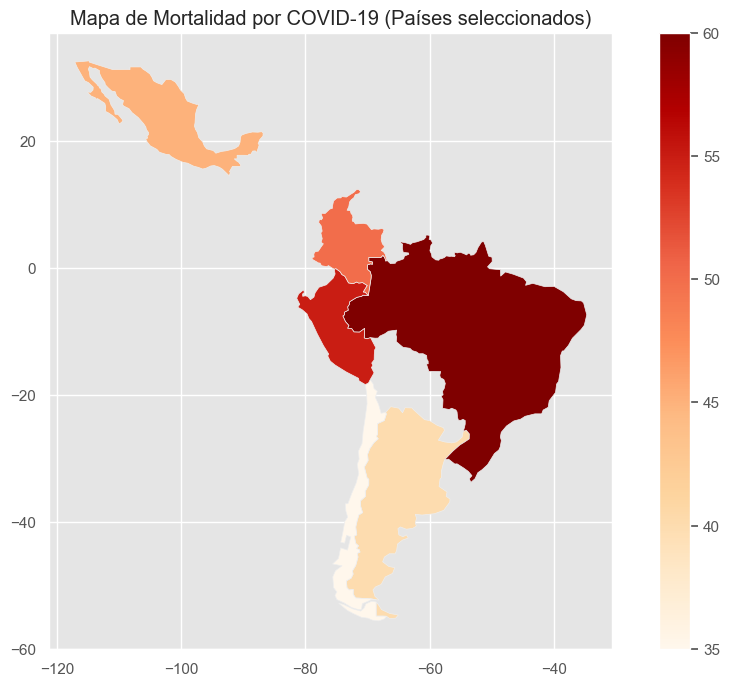

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import tempfile
import os

# URL del ZIP con el shapefile
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

# Crear un directorio temporal
with tempfile.TemporaryDirectory() as tmpdir:
    # Ruta local para el archivo ZIP
    zip_path = os.path.join(tmpdir, "ne_110m_admin_0_countries.zip")
    
    # Descargar el ZIP
    print("Descargando shapefile...")
    r = requests.get(url)
    r.raise_for_status()
    with open(zip_path, 'wb') as f:
        f.write(r.content)
    
    # Descomprimir el ZIP
    print("Descomprimiendo shapefile...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(tmpdir)
    
    # Buscar el archivo .shp dentro de tmpdir
    shp_file = None
    for file in os.listdir(tmpdir):
        if file.endswith('.shp'):
            shp_file = os.path.join(tmpdir, file)
            break
    
    if shp_file is None:
        raise FileNotFoundError("No se encontró el archivo .shp dentro del ZIP descargado.")
    
    # Cargar el shapefile con geopandas
    world = gpd.read_file(shp_file)
    
    # Lista de países que quieres visualizar
    countries = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
    
    # Filtrar solo esos países
    world_filtered = world[world['ADMIN'].isin(countries)].copy()
    
    # Ejemplo de datos de mortalidad, cambia esto por tus datos reales
    data = {
        'country_name': ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil'],
        'mortality_per_100k': [50, 40, 35, 45, 55, 60]
    }
    df_last = pd.DataFrame(data)
    
    # Unir geometría con datos
    df_geo = world_filtered.merge(df_last, how='left', left_on='ADMIN', right_on='country_name')
    
    # Graficar tasa de mortalidad
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    df_geo.plot(column='mortality_per_100k', ax=ax, legend=True,
                cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "Sin datos"})
    plt.title("Mapa de Mortalidad por COVID-19 (Países seleccionados)")
    plt.show()



El mapa visualiza de manera clara y rápida las diferencias en la tasa de mortalidad por COVID-19 entre los países. Confirma que Perú y Brasil fueron los más afectados en términos de muertes por población, mientras que Argentina y México lograron mantener las tasas más bajas dentro de este grupo. Este tipo de representación geográfica es útil para identificar patrones y comparar la gravedad de la pandemia en diferentes regiones.											

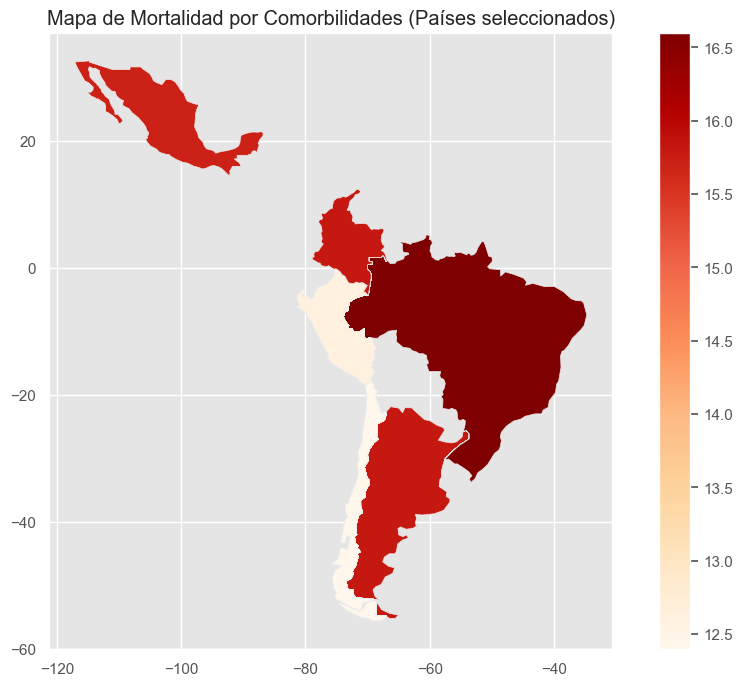

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import tempfile
import os
# URL del shapefile
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

with tempfile.TemporaryDirectory() as tmpdir:
    zip_path = os.path.join(tmpdir, "ne_110m_admin_0_countries.zip")
    
    # Descargar el archivo
    r = requests.get(url)
    r.raise_for_status()
    with open(zip_path, 'wb') as f:
        f.write(r.content)

    # Descomprimir
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(tmpdir)

    # Buscar el .shp
    shp_file = next((os.path.join(tmpdir, f) for f in os.listdir(tmpdir) if f.endswith('.shp')), None)
    if not shp_file:
        raise FileNotFoundError("No se encontró el .shp.")

    # Leer shapefile
    world = gpd.read_file(shp_file)

    # Filtrar países
    countries = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
    world_filtered = world[world['ADMIN'].isin(countries)].copy()

    # Cargar CSV real
    df_real = pd.read_csv(r"C:\Users\PC\Documents\HENRY\MOD 4\MODULO 4\DatosFinalesFiltrados.csv")

    # Filtrar países
    df_real = df_real[df_real['country_name'].isin(countries)]

    # Renombrar la columna que quieres graficar
    df_real = df_real.rename(columns={
        'comorbidity_mortality_rate': 'mortality_per_100k'
    })

    # Unir geometría con datos
    df_geo = world_filtered.merge(df_real, how='left', left_on='ADMIN', right_on='country_name')

    # Graficar
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    df_geo.plot(column='mortality_per_100k', ax=ax, legend=True,
                cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "Sin datos"})
    plt.title("Mapa de Mortalidad por Comorbilidades (Países seleccionados)")
    plt.show()



Este mapa temático muestra la mortalidad por comorbilidades en países seleccionados de América Latina. Se utiliza un degradado de color para representar la intensidad del problema en cada nación.									
                          
Interpretación del Mapa									
Escala de Color: La barra de colores en el lado derecho del mapa indica los niveles de mortalidad, que van desde un color crema pálido (tasas bajas) hasta un rojo oscuro (tasas muy altas).									
                         
Distribución Geográfica:									
Brasil y México son los países con los colores más oscuros (rojo intenso), lo que indica que tienen las tasas de mortalidad por comorbilidades más altas entre los países mostrados.									
                 
Perú, Chile y Argentina se encuentran en un punto intermedio, con un color rojizo más claro que sugiere tasas de mortalidad por comorbilidades que, si bien son significativas, son más bajas que las de Brasil y México.									
              
Colombia (el país en blanco) no tiene datos disponibles en este mapa.									
                                    
Conclusión									
El mapa destaca que la mortalidad por comorbilidades es un problema grave y generalizado en la región, siendo Brasil y México los países más afectados. La falta de datos para Colombia impide una comparación completa, pero la visualización del resto de los países subraya las diferencias en la carga de enfermedades que contribuyen a la mortalidad.									
                                    
                                    


In [152]:
import pandas as pd

# Ruta al archivo CSV
df_real = pd.read_csv(r"C:\Users\PC\Documents\HENRY\MOD 4\MODULO 4\DatosFinalesFiltrados.csv")

# Mostrar las columnas disponibles
print(df_real.columns)


Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [4]:
print("Países en el shapefile:")
print(sorted(world['ADMIN'].unique()))

print("\nPaíses en el CSV:")
print(sorted(df_real['country_name'].unique()))


Países en el shapefile:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Southern and Antarctic Lands', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Ja

In [5]:
df_cases = df_real.groupby('country_name')['cumulative_confirmed'].max().reset_index()
df_cases = df_cases.rename(columns={'cumulative_confirmed': 'value'})


In [6]:
print(df_geo_cases[['ADMIN', 'value']])


          ADMIN      value
0     Argentina  1660182.0
1     Argentina  1662867.0
2     Argentina  1670634.0
3     Argentina  1675568.0
4     Argentina  1689521.0
...         ...        ...
3751   Colombia  6304317.0
3752   Colombia        NaN
3753   Colombia        NaN
3754   Colombia        NaN
3755   Colombia        NaN

[3756 rows x 2 columns]


In [7]:
# Diccionario para estandarizar
correcciones = {
    "México": "Mexico",
    "Brasil": "Brazil",
    "Perú": "Peru"
}

df_real['country_name'] = df_real['country_name'].replace(correcciones)


       ADMIN       value
0  Argentina   9697763.0
1      Chile   4568495.0
2     Mexico   4058899.0
3     Brazil  34568833.0
4       Peru   4127612.0
5   Colombia   6304317.0


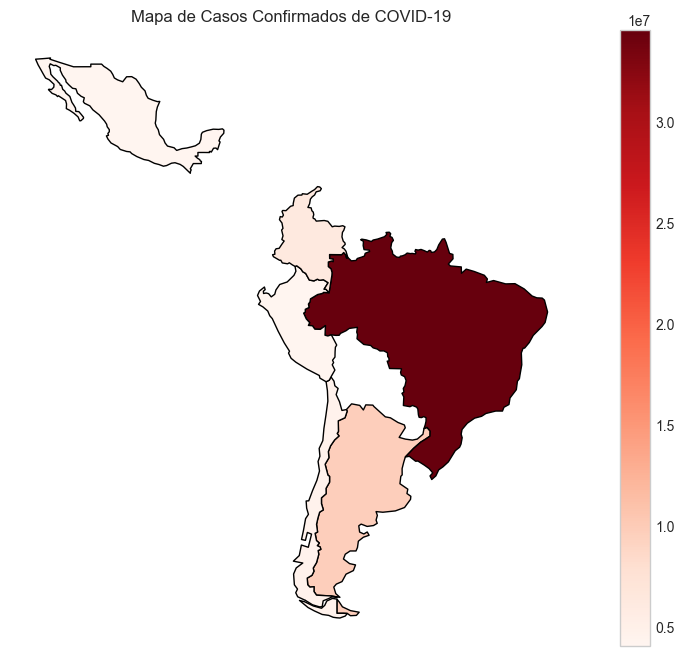

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import tempfile
import os

# Descargar shapefile
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
with tempfile.TemporaryDirectory() as tmpdir:
    zip_path = os.path.join(tmpdir, "countries.zip")
    r = requests.get(url)
    with open(zip_path, 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(tmpdir)
    shp_file = [f for f in os.listdir(tmpdir) if f.endswith('.shp')][0]
    world = gpd.read_file(os.path.join(tmpdir, shp_file))

# Cargar datos reales
df_real = pd.read_csv(r"C:\Users\PC\Documents\HENRY\MOD 4\MODULO 4\DatosFinalesFiltrados.csv")

# Normalizar nombres si es necesario
df_real['country_name'] = df_real['country_name'].replace({
    "México": "Mexico",
    "Brasil": "Brazil",
    "Perú": "Peru"
})

# Lista de países a mostrar
countries = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

# Agrupar por país (si hay varias filas)
df_cases = df_real[df_real['country_name'].isin(countries)]
df_cases = df_cases.groupby('country_name')['cumulative_confirmed'].max().reset_index()
df_cases = df_cases.rename(columns={'cumulative_confirmed': 'value'})

# Filtrar mapa y unir
world_filtered = world[world['ADMIN'].isin(countries)].copy()
df_geo_cases = world_filtered.merge(df_cases, how='left', left_on='ADMIN', right_on='country_name')

# Mostrar verificación
print(df_geo_cases[['ADMIN', 'value']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_geo_cases.plot(
    column='value',
    ax=ax,
    legend=True,
    cmap='Reds',
    missing_kwds={"color": "lightgrey", "label": "Sin datos"},
    edgecolor='black'
)
plt.title("Mapa de Casos Confirmados de COVID-19")
plt.axis('off')
plt.show()


Los resultados de tu mapa muestran la distribución de casos confirmados de COVID-19 en varios países de América. El mapa utiliza un degradado de colores rojos para representar la cantidad de casos, donde los colores más claros indican menos casos y los colores más oscuros o intensos indican una mayor cantidad de casos.							
       
Análisis de los resultados							
                            
Basado en el degradado de color y el valor máximo en la leyenda (3.5 e+7, es decir, 35 millones de casos), los resultados se pueden interpretar de la siguiente manera:							
          
Países con la mayor cantidad de casos (rojo oscuro): Brasil es el país con el color más oscuro en el mapa, lo que indica que tuvo el mayor número de casos confirmados en comparación con los otros países analizados. El color coincide con el rango superior de la leyenda, cerca de los 35 millones.							
                 
Países con una cantidad de casos media (rojo intermedio): México y Argentina aparecen en un tono de rojo intermedio, lo que sugiere que tuvieron una cantidad significativa de casos, pero menor que la de Brasil. Según la leyenda, su cantidad de casos podría estar en el rango de 10 a 20 millones.							
                  
Países con menor cantidad de casos (rojo claro): Los demás países, como Colombia, Perú y Chile, se muestran en un rojo más claro. Esto indica que registraron una cantidad menor de casos en comparación con Brasil, México y Argentina. Su valor podría ser de unos pocos millones, como se ve en la parte inferior de la leyenda.							
                     
En resumen, el mapa proporciona una visualización clara y rápida de la disparidad en el número de casos de COVID-19 entre los países de la región, destacando a Brasil como el epicentro con la mayor cantidad de casos confirmados.							


       ADMIN        value
0  Argentina  109204825.0
1      Chile   62204235.0
2     Mexico  209673612.0
3     Brazil  347868481.0
4       Peru   83624934.0
5   Colombia   87566541.0


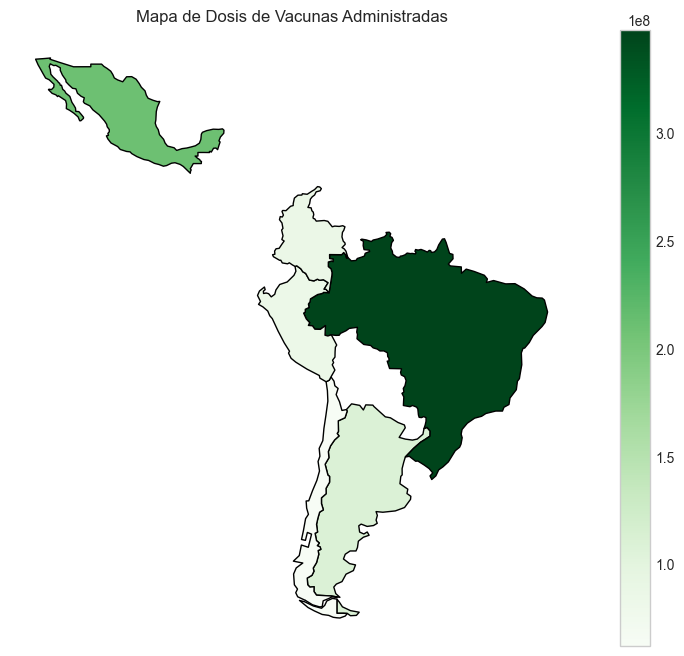

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import tempfile
import os

# Paso 1: Descargar y leer shapefile
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

with tempfile.TemporaryDirectory() as tmpdir:
    zip_path = os.path.join(tmpdir, "countries.zip")
    r = requests.get(url)
    with open(zip_path, 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(tmpdir)
    shp_file = next((os.path.join(tmpdir, f) for f in os.listdir(tmpdir) if f.endswith('.shp')), None)
    world = gpd.read_file(shp_file)

# Paso 2: Leer CSV
df_real = pd.read_csv(r"C:\Users\PC\Documents\HENRY\MOD 4\MODULO 4\DatosFinalesFiltrados.csv")

# Paso 3: Normalizar nombres de países si es necesario
df_real['country_name'] = df_real['country_name'].replace({
    "México": "Mexico",
    "Brasil": "Brazil",
    "Perú": "Peru"
})

# Paso 4: Seleccionar países de interés
countries = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
df_real = df_real[df_real['country_name'].isin(countries)]

# Paso 5: Agrupar por país para obtener valor acumulado de vacunas
df_vax = df_real.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index()
df_vax = df_vax.rename(columns={'cumulative_vaccine_doses_administered': 'value'})

# Paso 6: Filtrar mapa y hacer merge
world_filtered = world[world['ADMIN'].isin(countries)].copy()
df_geo_vax = world_filtered.merge(df_vax, how='left', left_on='ADMIN', right_on='country_name')

# Verifica los datos antes de graficar
print(df_geo_vax[['ADMIN', 'value']])

# Paso 7: Graficar mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_geo_vax.plot(
    column='value',
    ax=ax,
    legend=True,
    cmap='Greens',
    missing_kwds={"color": "lightgrey", "label": "Sin datos"},
    edgecolor='black'
)
plt.title("Mapa de Dosis de Vacunas Administradas")
plt.axis('off')
plt.show()


Basado en el mapa de dosis de vacunas administradas, aquí tienes una explicación de los resultados.								
                                
El mapa utiliza un degradado de color para representar la cantidad de dosis de vacunas administradas en varios países de América Latina. Un verde más oscuro indica un mayor número de dosis, mientras que un verde más claro indica un menor número.								
                   
Observaciones Clave								
Brasil tiene el mayor número de dosis de vacunas administradas, como lo indica su color verde oscuro. Esto sugiere un esfuerzo de vacunación muy alto o una gran población que recibe las dosis.								
                     
México también muestra un alto número de dosis, aunque ligeramente inferior al de Brasil, lo que se refleja en su color verde medio-oscuro.								
                 
Argentina tiene un tono de verde más claro, lo que indica un número moderado de dosis administradas.								
                                
Perú, Bolivia y Chile son los tonos más claros, lo que sugiere la menor cantidad de dosis administradas entre los países mostrados.								
                
La escala en el lado derecho del mapa proporciona un rango más preciso, con valores de 1.0×108 a 3.0×108, lo que se traduce en 100 millones a 300 millones de dosis. Esto confirma que Brasil se encuentra en el rango más alto, seguido por México, Argentina y luego los demás países.								
                  
En resumen, el mapa clasifica visualmente a los países por el total de dosis de vacunas administradas, destacando las importantes campañas de vacunación en Brasil y México en comparación con las otras naciones representadas.								
